In [21]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
from itertools import combinations

# for modeling
from sklearn.feature_selection import SelectKBest, f_classif 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report   
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from scipy.stats import chi2_contingency, pointbiserialr, skew

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
# Load the required data for the first part of assigment.
SECOM_df = pd.read_csv('secom_data.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [23]:
# View some initial records.
SECOM_df.head()

,Target,Time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,

In [24]:
# Generate dataframe dimensions.
SECOM_df.shape

(1567, 592)

In [25]:
SECOM_df.describe().map('{:,.3f}'.format)

,Target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
count,"1,567.000","1,561.000","1,560.000","1,553.000","1,553.000","1,553.000","1,553.000","1,553.000","1,558.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,564.000","1,564.000","1,564.000","1,564.000","1,564.000","1,564.000","1,557.000","1,567.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,543.000","1,543.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,563.000","1,563.000","1,563.000","1,563.000","1,563.000","1,563.000","1,560.000","1,561.000","1,561.000","1,561.000","1,560.000","1,560.000","1,560.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000",773.000,773.000,"1,561.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,566.000","1,555.000",226.000,"1,567.000","1,567.000","1,567.000","1,516.000","1,516.000","1,561.000","1,565.000","1,565.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,565.000","1,565.000","1,561.000","1,561.000","1,561.000","1,561.000",549.000,549.000,549.000,852.000,"1,567.000","1,567.000","1,567.000","1,567.000","1,567.000","1,543.000","1,567.000","1,567.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,559.000","1,559.000","1,559.000","1,562.000","1,561.000","1,560.000","1,553.000","1,553.000","1,553.000","1,553.000","1,553.000","1,558.000","1,565.000","1,565.000

In [26]:
# Define Outcome and Explanatory Variables.

Y = SECOM_df['Target']
X = SECOM_df.drop(['Target','Time'],axis=1)

In [27]:
# Rename Outcome Variables to Binary.
Y = Y.replace({1: 1, -1: 0})

In [28]:
# Assess Missing Values per Feature.
missing_counts = X.isna().sum()

print("Missing values per feature:\n", missing_counts[missing_counts>0])

print(f"Total features with missing values: {sum(missing_counts>0)}")

print(f"Total missing values: {sum(missing_counts)}")

print(f"Total proportion of missing values: {sum(missing_counts)/(1567*590): .3f} ")

Missing values per feature:
 1         6
2         7
3        14
4        14
5        14
6        14
7        14
8         9
9         2
10        2
11        2
12        2
13        2
14        3
15        3
16        3
17        3
18        3
19        3
20       10
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
30        2
31        2
32        2
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41       24
42       24
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
53        1
54        4
55        4
56        4
57        4
58        4
59        4
60        7
61        6
62        6
63        6
64        7
65        7
66        7
67        6
68        6
69        6
70        6
71        6
72        6
73      794
74      794
75        6
76       24
77       24
78       24
79       24
80       24
81       24
82       24

In [29]:
# Group Features by Number of Missing Values to Explore Patterns.

missing_groups = missing_counts.groupby(missing_counts).groups

print("\nFeatures grouped by number of missing values:")
for missing_value, features in missing_groups.items():
    if missing_value > 0:
        print(f"Missing {missing_value} values: {list(features)}")


Features grouped by number of missing values:
Missing 1 values: ['33', '34', '35', '36', '37', '38', '39', '40', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '84', '171', '172', '173', '174', '175', '176', '177', '178', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '219', '306', '307', '308', '309', '310', '311', '312', '313', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '357', '442', '443', '444', '445', '446', '447', '448', '449', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '491', '559', '560', '561', '562', '583', '584', '585', '586', '587', '588', '589', '590']
Missing 2 values: ['9', '10', '11', '12', '13', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '93', '94', '104', '105', '145', '146', '147', '148', '149', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '228', '229', '239', '240', '280', '281', '282', '283', '2

In [30]:
# Run Descriptive Statistics to Identify Constant Features.

desc_stats = X.describe().T
desc_stats['std'] = X.std()
desc_stats['unique_count'] = X.nunique()
desc_stats['missing_count'] = missing_counts

In [31]:
# Identify Features with Zero Standard Deviation (Constant Values).

constant_features = desc_stats[desc_stats['std'] == 0].index

print(f"\nFeatures with zero standard deviation (constant values):\n", constant_features)


Features with zero standard deviation (constant values):
 Index(['6', '14', '43', '50', '53', '70', '98', '142', '150', '179',
       ...
       '530', '531', '532', '533', '534', '535', '536', '537', '538', '539'],
      dtype='object', length=116)


In [32]:
# Cross-Check that Minimum equals Maximum Values for Confirmation.

constant_features_confirmed = constant_features[(desc_stats.loc[constant_features, 'min'] == desc_stats.loc[constant_features, 'max'])]

print(f"Confirmed constant features (min = max):\n", constant_features_confirmed)

Confirmed constant features (min = max):
 Index(['6', '14', '43', '50', '53', '70', '98', '142', '150', '179',
       ...
       '530', '531', '532', '533', '534', '535', '536', '537', '538', '539'],
      dtype='object', length=116)


In [33]:
# Reconcile Constant Features with the Outcome Variable.
features_to_remove = []
features_to_retain = []

baseline_fail_rate = Y.mean()
baseline_pass_rate = 1 - baseline_fail_rate
total_samples = len(Y)
expected_pass = baseline_pass_rate * total_samples
expected_fail = baseline_fail_rate * total_samples

for feature in constant_features_confirmed:
    
     # Check the Constant Value's Distribution Across Pass/Fail.
     constant_value = X[feature].dropna().iloc[0]
     non_missing_mask = X[feature].notna()
     non_missing_outcomes = Y[non_missing_mask]

     value_distribution = pd.crosstab(pd.Series(non_missing_outcomes, name='Outcome'), pd.Series(X[feature][non_missing_mask], name='Value'))

     # Chi-Square Test for Constant Value Distribution vs. Expected Baseline.
     observed_pass = value_distribution.iloc[0,0] if 0 in value_distribution.index else 0
     observed_fail = value_distribution.iloc[1,0] if 1 in value_distribution.index else 0
     non_missing_total = observed_pass + observed_fail
     expected_pass_adjusted = baseline_pass_rate * non_missing_total
     expected_fail_adjusted = baseline_fail_rate * non_missing_total

     contingency_table_value = [[observed_pass, observed_fail],[expected_pass_adjusted, expected_fail_adjusted]]
     chi2, p_value, _, _ = chi2_contingency(contingency_table_value)

     print(f"Chi-square test for constant value vs. expected baseline: chi2 = {chi2: .2f}, p-value = {p_value: .4f}")

     # Check Missingness Pattern vs. Outcome (Chi-Square Test).
     missing_indicator = X[feature].isna().astype(int)
     contingency_table_missing = pd.crosstab(missing_indicator, Y)
     chi2_missing, p_value_missing, _, _ = chi2_contingency(contingency_table_missing)

     print(f"Chi-square test for missingness vs. outcome: chi2 = {chi2_missing:.2f}, p-value = {p_value_missing:.4f}")

     # Decide Whether to Remove or Retain.

     if (p_value > 0.05) and (p_value_missing > 0.05):
          print(f"Feature {feature} has no predictive power (constant value and missingness not associated with outcome). Slotted for removal.")

          features_to_remove.append(feature)

     else:
          print(f"Feature {feature} has potential predictive power (constant value or missingness associated with outcome). Retaining.")

          features_to_retain.append(feature)

print(f"Features to remove (constant and not predictive):\n", features_to_remove)
print(f"Features to retain (constant but potentially predictive):\n", features_to_retain)

Chi-square test for constant value vs. expected baseline: chi2 =  0.00, p-value =  1.0000
Chi-square test for missingness vs. outcome: chi2 = 0.21, p-value = 0.6435
Feature 6 has no predictive power (constant value and missingness not associated with outcome). Slotted for removal.
Chi-square test for constant value vs. expected baseline: chi2 =  0.00, p-value =  1.0000
Chi-square test for missingness vs. outcome: chi2 = 0.00, p-value = 1.0000
Feature 14 has no predictive power (constant value and missingness not associated with outcome). Slotted for removal.
Chi-square test for constant value vs. expected baseline: chi2 =  0.00, p-value =  1.0000
Chi-square test for missingness vs. outcome: chi2 = 0.00, p-value = 1.0000
Feature 43 has no predictive power (constant value and missingness not associated with outcome). Slotted for removal.
Chi-square test for constant value vs. expected baseline: chi2 =  0.00, p-value =  1.0000
Chi-square test for missingness vs. outcome: chi2 = 0.00, p-va

In [34]:
# Remove Constant Features With No Predictive Power From The X Dataset.
X_reduced1 = X.drop(columns=constant_features_confirmed)

print(f"Removed {len(constant_features_confirmed)} constant features. New feature count: {X_reduced1.shape[1]}")

Removed 116 constant features. New feature count: 474


In [35]:
# Assess Missing Values per Feature.
missing_counts = X_reduced1.isna().sum()

print("Missing values per feature:\n", missing_counts[missing_counts>0])

print(f"Total features with missing values:{sum(missing_counts>0)}")

Missing values per feature:
 1         6
2         7
3        14
4        14
5        14
7        14
8         9
9         2
10        2
11        2
12        2
13        2
15        3
16        3
17        3
18        3
19        3
20       10
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
30        2
31        2
32        2
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41       24
42       24
44        1
45        1
46        1
47        1
48        1
49        1
51        1
52        1
54        4
55        4
56        4
57        4
58        4
59        4
60        7
61        6
62        6
63        6
64        7
65        7
66        7
67        6
68        6
69        6
71        6
72        6
73      794
74      794
75        6
76       24
77       24
78       24
79       24
80       24
81       24
82       24
83       24
84        1
85       12
86     1341
90       51
91       51

In [36]:
# Regroup Features by Number of Missing Values to Explore Patterns.
missing_groups = missing_counts.groupby(missing_counts).groups

print("\nFeatures grouped by number of missing values:")
for missing_value, features in missing_groups.items():
    if missing_value > 0:
        print(f"Missing {missing_value} values: {list(features)}")


Features grouped by number of missing values:
Missing 1 values: ['33', '34', '35', '36', '37', '38', '39', '40', '44', '45', '46', '47', '48', '49', '51', '52', '84', '171', '172', '173', '174', '175', '176', '177', '178', '181', '182', '183', '184', '185', '186', '188', '189', '219', '306', '307', '308', '309', '310', '311', '312', '313', '317', '318', '319', '320', '321', '322', '324', '325', '357', '442', '443', '444', '445', '446', '447', '448', '449', '453', '454', '455', '456', '457', '458', '460', '461', '491', '559', '560', '561', '562', '583', '584', '585', '586', '587', '588', '589', '590']
Missing 2 values: ['9', '10', '11', '12', '13', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '93', '94', '104', '105', '145', '146', '147', '148', '149', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '228', '229', '239', '240', '280', '281', '282', '283', '284', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305',

In [37]:
# Summary Statistics of Missingness.

print("\nSummary of missingness in non-constant features:")
print(f"Total features: {len(missing_counts)}")
print(f"Features with no missing values: {(missing_counts == 0).sum()}")
print(f"Features with missing values: {(missing_counts > 0).sum()}")
print(f"Average missing values per feature: {missing_counts.mean():.2f}")


Summary of missingness in non-constant features:
Total features: 474
Features with no missing values: 52
Features with missing values: 422
Average missing values per feature: 86.78


In [38]:
# Reconcile Non-Constant Features Missing Values with the Outcome Variable.
features_with_predictive_missingness = []
features_without_predictive_missingness = []

for feature in X_reduced1.columns: 
    if missing_counts.loc[feature] > 0:
          
     # Check Missingness Pattern vs. Outcome (Chi-Square Test).
        missing_indicator = X_reduced1[feature].isna().astype(int)
        contingency_table_missing = pd.crosstab(missing_indicator, Y)
        chi2_missing, p_value_missing, _, _ = chi2_contingency(contingency_table_missing, correction=False)

        print(f"\nFeature {feature} (Missing {missing_counts[feature]} values):")
        print(f"Chi-square test for missingness vs. outcome: chi2 = {chi2_missing:.2f}, p-value = {p_value_missing:.4f}")

     # Decide If Missingness Is Predictive.

        if (p_value_missing < 0.05):
            print(f"Feature {feature} has predictive missingness (p < 0.05).")

            features_with_predictive_missingness.append(feature)

        else:
            print(f"Feature {feature} has no predictive missingness (p >= 0.05).")

            features_without_predictive_missingness.append(feature)

print(f"Features with predictive missingness:\n", features_with_predictive_missingness)
print(f"Features without predictive missingness:\n", features_without_predictive_missingness)


Feature 1 (Missing 6 values):
Chi-square test for missingness vs. outcome: chi2 = 0.43, p-value = 0.5129
Feature 1 has no predictive missingness (p >= 0.05).

Feature 2 (Missing 7 values):
Chi-square test for missingness vs. outcome: chi2 = 0.66, p-value = 0.4152
Feature 2 has no predictive missingness (p >= 0.05).

Feature 3 (Missing 14 values):
Chi-square test for missingness vs. outcome: chi2 = 1.00, p-value = 0.3163
Feature 3 has no predictive missingness (p >= 0.05).

Feature 4 (Missing 14 values):
Chi-square test for missingness vs. outcome: chi2 = 1.00, p-value = 0.3163
Feature 4 has no predictive missingness (p >= 0.05).

Feature 5 (Missing 14 values):
Chi-square test for missingness vs. outcome: chi2 = 1.00, p-value = 0.3163
Feature 5 has no predictive missingness (p >= 0.05).

Feature 7 (Missing 14 values):
Chi-square test for missingness vs. outcome: chi2 = 1.00, p-value = 0.3163
Feature 7 has no predictive missingness (p >= 0.05).

Feature 8 (Missing 9 values):
Chi-square 

In [39]:
# Generate Descriptive Statistics By Pass/Fail.

# Combine X_reduced1 and Y for easier grouping.
data = X_reduced1.copy()
data['Y'] = Y

# Split into pass and fail groups.
pass_data = data[data['Y'] == 0].drop(columns='Y')
fail_data = data[data['Y'] == 1].drop(columns='Y')

In [40]:
# Descriptive Statistics For Fail.
fail_data.describe().map('{:,.3f}'.format)

,1,2,3,4,5,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,181,182,183,184,185,186,188,189,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,239,240,245,246,247,248,249,250,251,252,253,254,255,256,268,269,270,271,272,273,274,275,276,278,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,317,318,319,320,321,322,324,325,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,368,369,377,378,383,384,385,386,387,388,389,390,391,392,393,394,406,407,408,409,410,411,412,413,414,416,417,418,419,420,421,422,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,453,454,455,456,457,458,460,461,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,500,501,511,512,517,518,519,520,521,522,523,524,525,526,527,528,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
count,104.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,103.000,103.000,103.000,103.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,68.000,68.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,11.000,104.000,104.000,104.000,103.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,30.000,30.000,30.000,71.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,8.000,8.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,11.000,104.000,104.000,104.000,103.000,103.000,104.000,104.000,104.000,104.000,30.000,30.000,30.000,71.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,104.000,8.000,8.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,104.000,103.000,1

In [41]:
# Descriptive Statistics For Pass.
pass_data.describe().map('{:,.3f}'.format)

,1,2,3,4,5,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,181,182,183,184,185,186,188,189,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,239,240,245,246,247,248,249,250,251,252,253,254,255,256,268,269,270,271,272,273,274,275,276,278,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,317,318,319,320,321,322,324,325,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,368,369,377,378,383,384,385,386,387,388,389,390,391,392,393,394,406,407,408,409,410,411,412,413,414,416,417,418,419,420,421,422,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,453,454,455,456,457,458,460,461,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,500,501,511,512,517,518,519,520,521,522,523,524,525,526,527,528,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
count,"1,457.000","1,457.000","1,449.000","1,449.000","1,449.000","1,449.000","1,454.000","1,461.000","1,461.000","1,461.000","1,461.000","1,461.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,454.000","1,463.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,439.000","1,439.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,456.000","1,457.000","1,457.000","1,457.000","1,456.000","1,456.000","1,456.000","1,457.000","1,457.000","1,457.000","1,457.000","1,457.000",705.000,705.000,"1,457.000","1,439.000","1,439.000","1,439.000","1,439.000","1,439.000","1,439.000","1,439.000","1,439.000","1,462.000","1,451.000",215.000,"1,463.000","1,463.000","1,463.000","1,413.000","1,413.000","1,457.000","1,461.000","1,461.000","1,457.000","1,457.000","1,457.000","1,457.000","1,457.000","1,457.000","1,457.000","1,457.000","1,461.000","1,461.000","1,457.000","1,457.000","1,457.000","1,457.000",519.000,519.000,519.000,781.000,"1,463.000","1,463.000","1,463.000","1,463.000","1,463.000","1,439.000","1,463.000","1,463.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,454.000","1,455.000","1,455.000","1,455.000","1,458.000","1,457.000","1,457.000","1,449.000","1,449.000","1,449.000","1,449.000","1,454.000","1,461.000","1,461.000","1,461.000","1,461.000","1,461.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,454.000","1,463.000",130.000,130.000,"1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,462.000","1,460.000","1,456.000","1,457.000","1,457.000","1,457.000","1,456.000","1,456.000","1,456.000","1,457.000","

In [42]:
# Descriptive Statistics For Both.
X_reduced1.describe().map('{:,.3f}'.format)

,1,2,3,4,5,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,181,182,183,184,185,186,188,189,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,239,240,245,246,247,248,249,250,251,252,253,254,255,256,268,269,270,271,272,273,274,275,276,278,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,317,318,319,320,321,322,324,325,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,368,369,377,378,383,384,385,386,387,388,389,390,391,392,393,394,406,407,408,409,410,411,412,413,414,416,417,418,419,420,421,422,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,453,454,455,456,457,458,460,461,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,500,501,511,512,517,518,519,520,521,522,523,524,525,526,527,528,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
count,"1,561.000","1,560.000","1,553.000","1,553.000","1,553.000","1,553.000","1,558.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,564.000","1,564.000","1,564.000","1,564.000","1,564.000","1,557.000","1,567.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,543.000","1,543.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,563.000","1,563.000","1,563.000","1,563.000","1,563.000","1,563.000","1,560.000","1,561.000","1,561.000","1,561.000","1,560.000","1,560.000","1,560.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000",773.000,773.000,"1,561.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,543.000","1,566.000","1,555.000",226.000,"1,567.000","1,567.000","1,567.000","1,516.000","1,516.000","1,561.000","1,565.000","1,565.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,561.000","1,565.000","1,565.000","1,561.000","1,561.000","1,561.000","1,561.000",549.000,549.000,549.000,852.000,"1,567.000","1,567.000","1,567.000","1,567.000","1,567.000","1,543.000","1,567.000","1,567.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,558.000","1,559.000","1,559.000","1,559.000","1,562.000","1,561.000","1,560.000","1,553.000","1,553.000","1,553.000","1,553.000","1,558.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,564.000","1,564.000","1,564.000","1,564.000","1,564.000","1,557.000","1,567.000",138.000,138.000,"1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,565.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,566.000","1,563.000","1,560.000","1,561.000","1,561.000","1,561.000","1,560.000","1,560.000","1,560.000","1,561.000","

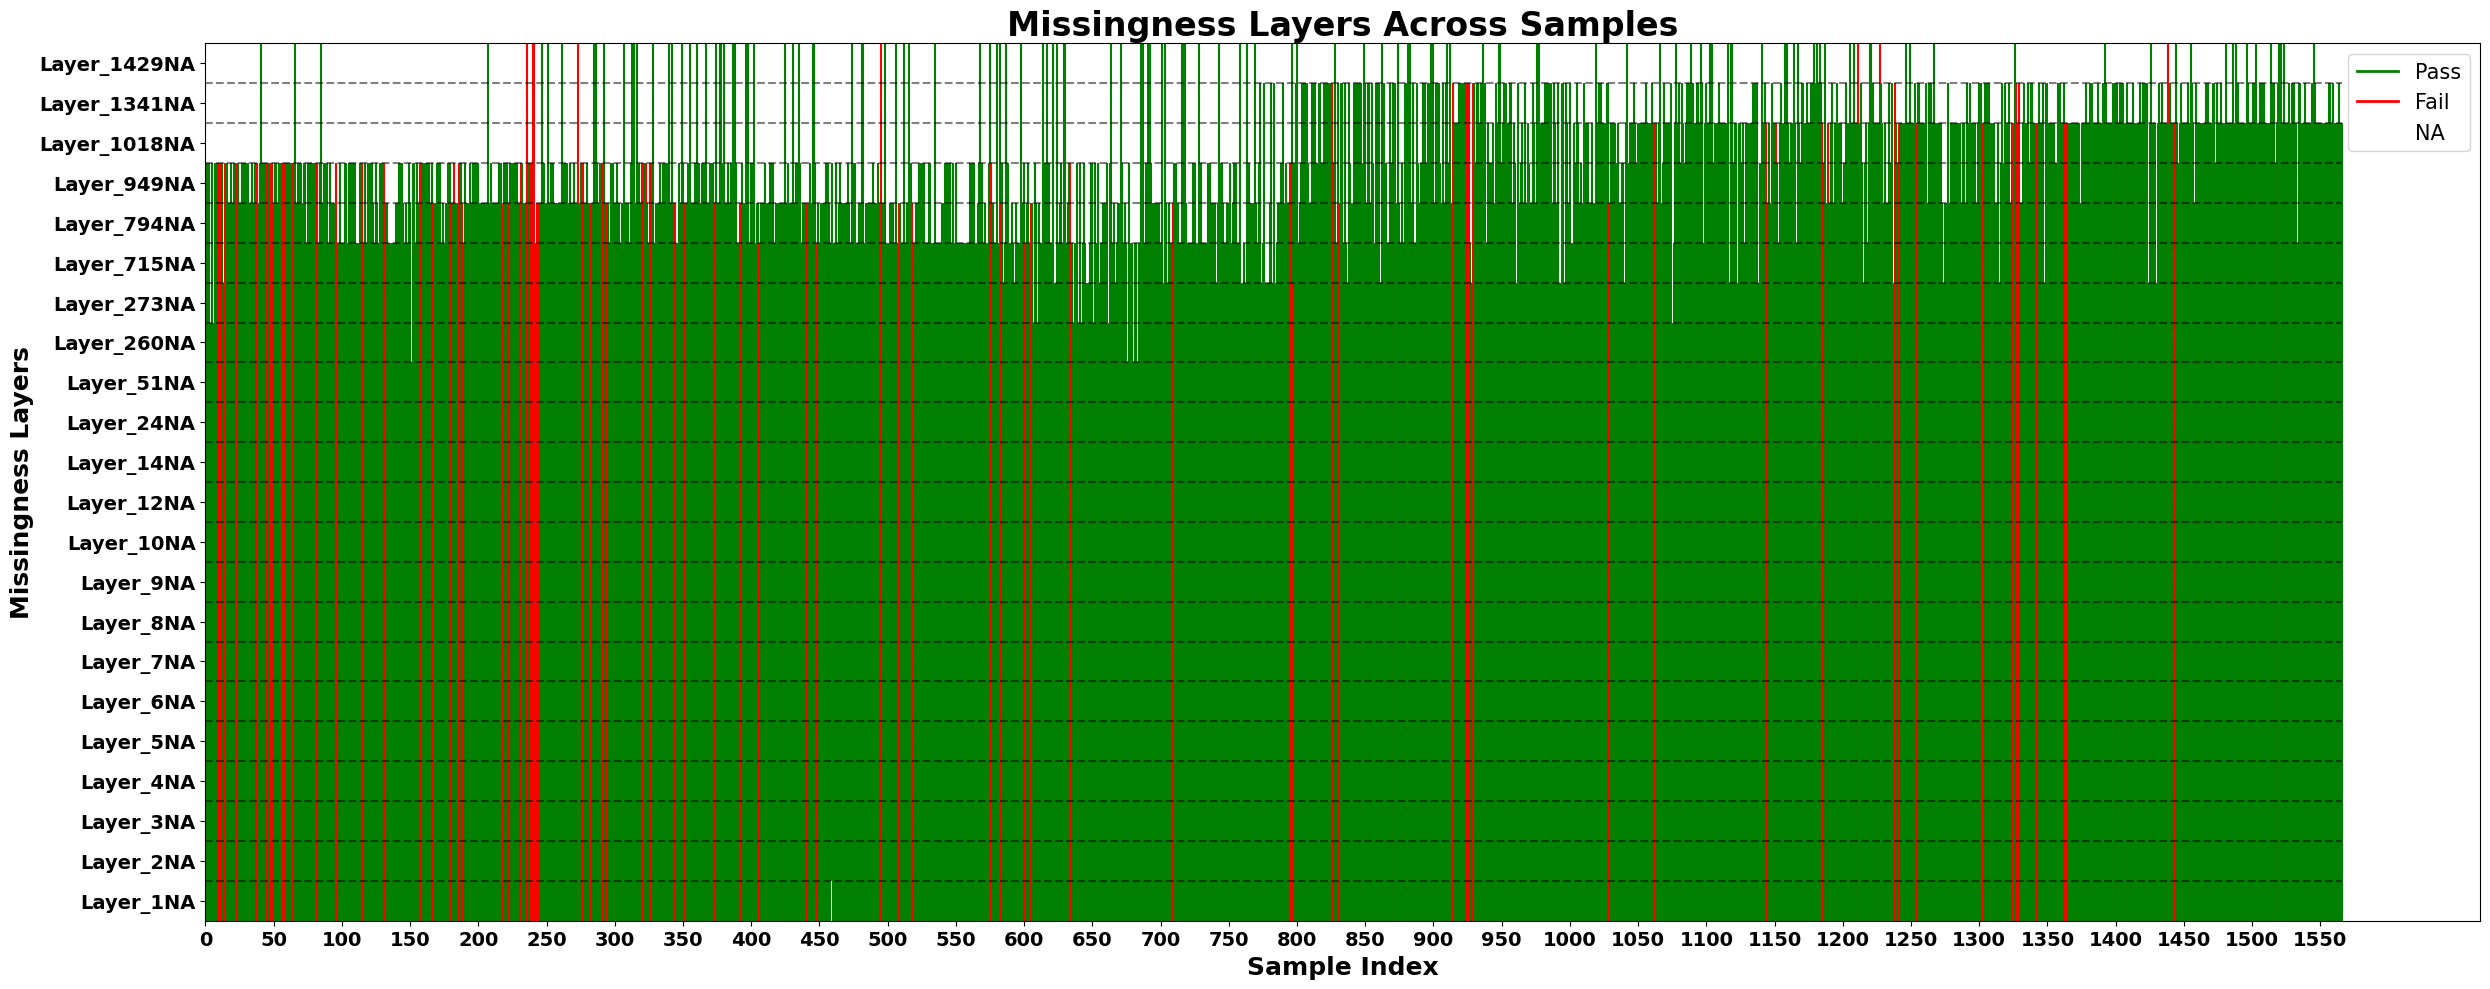

In [43]:
# Group features by missing values.

missing_counts = X_reduced1.isna().sum()

missing_groups = {}

for feature in X_reduced1.columns:
    if missing_counts[feature] > 0 and 'missing_' not in str(feature) and str(feature) != 'Y': 
        na_count = missing_counts[feature]                                
        if na_count not in missing_groups:
            missing_groups[na_count] = []
            missing_groups.setdefault(na_count, []).append(feature)

# Sort layers by NA count.

layer_na_counts = sorted(missing_groups.keys())
layer_labels = [f"Layer_{na}NA" for na in layer_na_counts]

# Create plot data.

plot_data = []

for j in range(len(X_reduced1)):
    color = 'green' if Y[j] == 0 else 'red'
    non_missing_layers = []
    for i, na_count in enumerate(layer_na_counts):
        if X_reduced1[missing_groups[na_count]].iloc[j].notna().any():
            non_missing_layers.append(i)

    if non_missing_layers:
        ymin = min(non_missing_layers)
        ymax = max(non_missing_layers)
        plot_data.append((j, ymin, ymax, color))

# Group layers for color-coding.

# Plot vertical lines.
plt.figure(figsize=(25,10))
for x, ymin, ymax, color in plot_data:
    plt.vlines(x, ymin - 0.5, ymax + 0.5, colors=color, linewidth=1.5, alpha=1.0, zorder=1)

# Customize axes.
plt.yticks(range(len(layer_labels)), layer_labels, fontsize=14, fontweight='bold')
plt.xticks(range(0, len(X_reduced1), 50), fontsize=14, fontweight='bold')
plt.xlabel("Sample Index", fontsize=18, fontweight='bold')
plt.ylabel("Missingness Layers", fontsize=18, fontweight='bold')
plt.title("Missingness Layers Across Samples", fontsize=24, fontweight='bold')
plt.xlim(0, len(X_reduced1) + 100)
plt.ylim(-0.5, len(layer_labels) - 0.5)

# Add horizontal grid lines.
grid_positions = np.arange(0.5, len(layer_labels) - 0.5, 1)
plt.hlines(grid_positions, 0, len(X_reduced1) - 1, colors='black', linestyles='--', alpha=0.5, zorder=2)

# Add legend for pass/fail.
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=2, label='Pass'),
                   Line2D([0], [0], color='red', lw=2, label='Fail'),
                   Line2D([0], [0], color='white', lw=2, label='NA', linestyle='--')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=15)

# Display visualization.

plt.tight_layout()
plt.savefig('secom_missingness_layers_lines.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
"""# Dictionary to store stats for all features
feature_stats = {}

for na in all_layers:
    features = missing_groups.get(na, [])
    for feature in features:
        non_missing = X_raw[feature].dropna()
        indices = non_missing.index
        y_subset = Y[indices]
       
        # Zero/near-zero stats
        near_zero = non_missing[non_missing <= 0.01]
        zero_count = len(near_zero)
        zero_proportion = zero_count / len(non_missing) if len(non_missing) > 0 else 0
       
        # Non-zero proportion
        non_zero_proportion = 1 - zero_proportion
       
        # Distribution stats
        skewness = skew(non_missing) if len(non_missing) > 0 else 0
        non_zero = non_missing[non_missing > 0.01]
        non_zero_mean = non_zero.mean() if len(non_zero) > 0 else 0
        non_zero_median = non_zero.median() if len(non_zero) > 0 else 0
       
        # Association with y
        zero_indices = near_zero.index
        non_zero_indices = non_zero.index
        failure_rate_zeros = y_subset[zero_indices].mean() if len(zero_indices) > 0 else 0
        failure_rate_non_zeros = y_subset[non_zero_indices].mean() if len(non_zero_indices) > 0 else 0
       
        feature_stats[feature] = {
            'layer': na,
            'zero_count': zero_count,
            'zero_proportion': zero_proportion,
            'non_zero_proportion': non_zero_proportion,
            'skewness': skewness,
            'non_zero_mean': non_zero_mean,
            'non_zero_median': non_zero_median,
            'failure_rate_zeros': failure_rate_zeros,
            'failure_rate_non_zeros': failure_rate_non_zeros
        }

# Display stats for all features
print("Per-Feature Zero/Near-Zero Analysis:")
for feature in sorted(feature_stats.keys()):
    stats = feature_stats[feature]
    print(f"Feature {feature} (Layer_{stats['layer']}NA):")
    print(f"  Zero/Near-Zero Count: {stats['zero_count']}")
    print(f"  Zero Proportion: {stats['zero_proportion']:.3f}")
    print(f"  Non-Zero Proportion: {stats['non_zero_proportion']:.3f}")
    print(f"  Skewness: {stats['skewness']:.3f}")
    print(f"  Non-Zero Mean: {stats['non_zero_mean']:.3f}")
    print(f"  Non-Zero Median: {stats['non_zero_median']:.3f}")
    print(f"  Failure Rate (Zeros): {stats['failure_rate_zeros']:.3f}")
    print(f"  Failure Rate (Non-Zeros): {stats['failure_rate_non_zeros']:.3f}")
    if stats['zero_proportion'] > 0.2 and stats['failure_rate_zeros'] < stats['failure_rate_non_zeros'] - 0.05:
        print("  Warning: Potential sensor performance issue")"""

In [44]:
# Section 1: Start with X_reduced1
X_indicators = X_reduced1.copy()

# Print basic info about X_reduced1
print(f"Number of features in X_reduced1: {len(X_reduced1.columns)}", flush=True)
print(f"Total samples in X_reduced1: {len(X_reduced1)}", flush=True)

# Section 2: Convert column names to strings
X_indicators.columns = X_indicators.columns.astype(str)

# Section 3: Add missingness indicators
# Predefined features with predictive missingness
predictive_features = ['73', '74', '113', '248', '346', '347', '386', '520']

# List to store missingness indicators
missing_indicators = []

print("Creating missingness indicators...", flush=True)
for feature in predictive_features:
    if feature not in X_indicators.columns:
        print(f"Warning: Feature {feature} not found in X_indicators.columns", flush=True)
        continue
   
    X_indicators[f'missing_{feature}'] = X_indicators[feature].isna().astype(int)
    missing_indicators.append(f'missing_{feature}')

# Sort the indicator list numerically by feature number
missing_indicators.sort(key=lambda x: int(x.split('_')[-1]))

# Print indicators
print(f"\nMissingness Indicators Created: {len(missing_indicators)}", flush=True)
for ind in missing_indicators:
    print(ind, flush=True)

# Section 4: Add composite indicators
late_features = ['245', '246', '247', '383', '384', '385', '517', '518', '519', '582']

# Verify that late_features exist in X_indicators
missing_late_features = [feat for feat in late_features if feat not in X_indicators.columns]
if missing_late_features:
    print(f"Warning: The following late_features are not in X_indicators.columns: {missing_late_features}", flush=True)

# Create composite indicator
X_indicators['missing_late_utilization'] = X_indicators[late_features].isna().any(axis=1).astype(int)

# Print confirmation of composite indicator
print("\nComposite Indicator Created:", flush=True)
print("missing_late_utilization", flush=True)

# Calculate proportion of NA features per sample (relative to original 590 features)
print("\nCalculating proportion of NA features per sample...")
na_count_per_sample = X.isna().sum(axis=1)  # X has 590 features (sensor measurements only)
denominator = 590  # Number of sensor measurement features
proportion_na_per_sample = na_count_per_sample / denominator
X_indicators['proportion_na_features'] = proportion_na_per_sample
print(f"Added 'proportion_na_features' column to X_indicators. Mean proportion: {proportion_na_per_sample.mean():.3f}")
print(f"Min proportion: {proportion_na_per_sample.min():.3f}, Max proportion: {proportion_na_per_sample.max():.3f}")

# Section 5: Remove features associated with Layers 1341NA and 1429NA

# Identify features to remove (exact match for layer names)
layers_to_remove = ['1341NA', '1429NA']
features_to_remove = ['86', '158', '159', '221', '293', '294', '359', '493']
for feature in X_indicators.columns:
    # Skip indicator columns
    if feature.startswith('missing_'):
        continue
    # Check if the feature name exactly matches or contains the layer name
    if feature in layers_to_remove or any(layer in feature for layer in layers_to_remove):
        features_to_remove.append(feature)

# Remove the identified features
if features_to_remove:
    print(f"Features to remove (Layers 1341NA and 1429NA): {features_to_remove}", flush=True)
    X_indicators.drop(columns=features_to_remove, inplace=True)
else:
    print("No features found for Layers 1341NA and 1429NA based on name matching.", flush=True)

# Print updated info about X_indicators
print(f"\nNumber of features in X_indicators after removal: {len(X_indicators.columns)}", flush=True)

Number of features in X_reduced1: 474
Total samples in X_reduced1: 1567
Creating missingness indicators...

Missingness Indicators Created: 8
missing_73
missing_74
missing_113
missing_248
missing_346
missing_347
missing_386
missing_520

Composite Indicator Created:
missing_late_utilization

Calculating proportion of NA features per sample...
Added 'proportion_na_features' column to X_indicators. Mean proportion: 0.045
Min proportion: 0.007, Max proportion: 0.258
Features to remove (Layers 1341NA and 1429NA): ['86', '158', '159', '221', '293', '294', '359', '493']

Number of features in X_indicators after removal: 476


In [45]:
# Section 6: Eliminate features with >=1341 zero values AND zero as the minimum value

# Threshold for zero values
ZERO_THRESHOLD = 1341

# Identify features with >=1341 zeros AND zero as the minimum value (excluding indicator columns)
features_with_excessive_zeros = []
for feature in X_indicators.columns:
    # Skip indicator columns
    if feature.startswith('missing_'):
        continue
   
    # Count zeros (using == 0 as the threshold for zeros)
    zero_count = (X_indicators[feature] == 0).sum()
   
    # Compute the minimum value (excluding missing values)
    min_value = X_indicators[feature].dropna().min() if X_indicators[feature].notna().sum() > 0 else float('inf')
   
    # Check both conditions: zero_count >= 1341 AND minimum value == 0
    if zero_count >= ZERO_THRESHOLD and min_value == 0:
        features_with_excessive_zeros.append(feature)
        print(f"Feature {feature}: Zero count = {zero_count}, Minimum value = {min_value:.6f}", flush=True)

# Remove the identified features
if features_with_excessive_zeros:
    print(f"Features to remove (zeros >= {ZERO_THRESHOLD} and min == 0): {features_with_excessive_zeros}", flush=True)
    X_indicators.drop(columns=features_with_excessive_zeros, inplace=True)
else:
    print(f"No features found with zeros >= {ZERO_THRESHOLD} and minimum value == 0.", flush=True)

# Print updated info about X_indicators
print(f"\nNumber of features in X_indicators after zero-based removal: {len(X_indicators.columns)}", flush=True)

# Section 7: Convert zeros to NaN based on the three criteria
print("\n" + "="*50, flush=True)
print("Section 7: Converting zeros to NaN based on criteria...", flush=True)

zero_to_nan_counts = {}
for feature in X_indicators.columns:
    # Skip 'missing_' indicator columns
    if feature.startswith('missing_'):
        continue

    # Check if the feature has any zeros
    zero_mask = (X_indicators[feature] == 0)
    total_zeros = zero_mask.sum()
    if total_zeros == 0:
        continue

    # Filter: Only consider features with 0 < total_zeros <= 10
    if not (0 < total_zeros <= 10):
        continue

    # Compute statistics for non-zero values
    non_zero_mask = (X_indicators[feature] != 0) & (X_indicators[feature].notna())
    non_zero_values = X_indicators[feature][non_zero_mask]
    if len(non_zero_values) == 0:
        continue  # Skip if there are no non-zero values

    feature_min = X_indicators[feature].min()
    feature_max = X_indicators[feature].max()
    non_zero_mean = non_zero_values.mean()
    non_zero_std = non_zero_values.std()
    non_zero_skew = skew(non_zero_values.dropna()) if len(non_zero_values.dropna()) > 0 else 0

    # Debug: Print statistics for features with zeros
    z_score = abs(0 - non_zero_mean) / non_zero_std if non_zero_std > 0 else 0
    print(f"Feature {feature}: Zeros = {total_zeros}, Min = {feature_min:.6f}, Max = {feature_max:.6f}, "
          f"Non-zero Skew = {non_zero_skew:.2f}, Non-zero Mean = {non_zero_mean:.6f}, Non-zero Std = {non_zero_std:.6f}, "
          f"Z-score of Zero = {z_score:.2f}", flush=True)

    # Criterion 1: Minimum = 0 and significant left skew (skew < -0.5)
    criterion_1 = False
    if feature_min == 0:
        if non_zero_skew < -0.5:
            criterion_1 = True

    # Criterion 2: Minimum < 0, Maximum = 0, and significant right skew (skew > 0.5)
    criterion_2 = False
    if feature_min < 0 and feature_max == 0:
        if non_zero_skew > 0.5:
            criterion_2 = True

    # Criterion 3: Zero falls outside non-zero distribution, with exception for abs(maximum) < 0.05
    criterion_3 = False
    # First, exclude features where Min < 0 and Max > 0 (zero is within range)
    if feature_min < 0 and feature_max > 0:
        criterion_3 = False
    else:
        if abs(feature_max) >= 0.05:
            if non_zero_std > 0:
                z_score = abs(0 - non_zero_mean) / non_zero_std
                if z_score > 2.0:  # Relaxed to capture more features
                    criterion_3 = True

    # Convert zeros to NaN if any criterion is met
    if criterion_1 or criterion_2 or criterion_3:
        X_indicators.loc[zero_mask, feature] = np.nan
        zero_to_nan_counts[feature] = int(total_zeros)

print(f"Total features with zeros converted to NaN: {len(zero_to_nan_counts)}", flush=True)
print(f"Features affected: {list(zero_to_nan_counts.keys())}", flush=True)
print("="*50 + "\n", flush=True)

# Section 8: Impute NaN values based on original layers
print("\nSection 8: Imputing NaN values based on original layers...", flush=True)

# Step 1: Compute original NaN counts (before zero-to-NaN conversion)
current_nan_counts = X_indicators.isna().sum().clip(upper=1567)
original_nan_counts = current_nan_counts.copy()
for feature, zero_count in zero_to_nan_counts.items():
    if feature in original_nan_counts:
        original_nan_counts[feature] = max(0, current_nan_counts[feature] - zero_count)

# Group features by original NaN counts
original_nan_count_groups = original_nan_counts.groupby(original_nan_counts).groups

# Step 2: Helper function to compute means for imputation
def compute_means(feature, pass_mask, fail_mask):
    pass_mean = X_indicators[feature][pass_mask].mean() if pass_mask.sum() > 0 else np.nan
    fail_mean = X_indicators[feature][fail_mask].mean() if fail_mask.sum() > 0 else np.nan
    overall_mask = (X_indicators[feature] != 0) & (X_indicators[feature].notna())
    overall_mean = X_indicators[feature][overall_mask].mean() if overall_mask.sum() > 0 else 0
   
    if np.isnan(pass_mean):
        pass_mean = overall_mean
    if np.isnan(fail_mean):
        fail_mean = overall_mean
   
    return pass_mean, fail_mean

# Step 3: Impute NaN values for layers 0NA to 794NA using pass/fail means
print("Imputing features in layers 0NA to 794NA using pass/fail means...")
for na_count, features in sorted(original_nan_count_groups.items()):
    if 0 <= na_count <= 794:
        for feature in features:
            if X_indicators[feature].isna().any():
                pass_mask = (Y == 0) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
                fail_mask = (Y == 1) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
                pass_mean, fail_mean = compute_means(feature, pass_mask, fail_mask)
               
                nan_pass_mask = (X_indicators[feature].isna()) & (Y == 0)
                nan_fail_mask = (X_indicators[feature].isna()) & (Y == 1)
               
                if not np.isnan(pass_mean):
                    X_indicators.loc[nan_pass_mask, feature] = pass_mean
                if not np.isnan(fail_mean):
                    X_indicators.loc[nan_fail_mask, feature] = fail_mean

# Step 4: Impute NaN values for layers 949NA and 1018NA using the hybrid approach
print("Imputing features in layers 949NA and 1018NA using the hybrid approach...")
for na_count in [949, 1018]:
    if na_count in original_nan_count_groups:
        features = original_nan_count_groups[na_count]
        for feature in features:
            if X_indicators[feature].isna().any():
                # Part 1: Overall mean for rows < 800
                overall_mask = (X_indicators[feature] != 0) & (X_indicators[feature].notna())
                overall_mean = X_indicators[feature][overall_mask].mean() if overall_mask.sum() > 0 else 0
                nan_below_800_mask = (X_indicators[feature].isna()) & (X_indicators.index < 800)
                if not np.isnan(overall_mean):
                    X_indicators.loc[nan_below_800_mask, feature] = overall_mean
               
                # Part 2: Pass/fail means for rows >= 800
                pass_mask = (Y == 0) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
                fail_mask = (Y == 1) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
                pass_mean, fail_mean = compute_means(feature, pass_mask, fail_mask)
               
                nan_pass_above_800_mask = (X_indicators[feature].isna()) & (Y == 0) & (X_indicators.index >= 800)
                nan_fail_above_800_mask = (X_indicators[feature].isna()) & (Y == 1) & (X_indicators.index >= 800)
               
                if not np.isnan(pass_mean):
                    X_indicators.loc[nan_pass_above_800_mask, feature] = pass_mean
                if not np.isnan(fail_mean):
                    X_indicators.loc[nan_fail_above_800_mask, feature] = fail_mean

# Step 5: Handle remaining features with NaN values
remaining_features_with_na = [col for col in X_indicators.columns if X_indicators[col].isna().any()]
if remaining_features_with_na:
    print("Imputing remaining features with NaN values using pass/fail means...")
    for feature in remaining_features_with_na:
        pass_mask = (Y == 0) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
        fail_mask = (Y == 1) & (X_indicators[feature] != 0) & (X_indicators[feature].notna())
        pass_mean, fail_mean = compute_means(feature, pass_mask, fail_mask)
       
        nan_pass_mask = (X_indicators[feature].isna()) & (Y == 0)
        nan_fail_mask = (X_indicators[feature].isna()) & (Y == 1)
       
        if not np.isnan(pass_mean):
            X_indicators.loc[nan_pass_mask, feature] = pass_mean
        if not np.isnan(fail_mean):
            X_indicators.loc[nan_fail_mask, feature] = fail_mean

# Step 6: Verify no NaN values remain
remaining_nans = X_indicators.isna().sum().sum()
print(f"Verification - Total remaining NaN values in X_indicators: {remaining_nans}")

# Section 9: Verify imputation
print("\nVerifying imputation...", flush=True)
for feature in X_indicators.columns:
    # Skip indicator columns
    if feature.startswith('missing_'):
        continue
    missing_count = X_indicators[feature].isna().sum()
    zero_count = (X_indicators[feature] == 0).sum()
    print(f"Feature {feature}: Post-imputation Missing Count = {missing_count}, Zero Count = {zero_count}", flush=True)

Feature 75: Zero count = 1560, Minimum value = 0.000000
Feature 115: Zero count = 1545, Minimum value = 0.000000
Feature 207: Zero count = 1560, Minimum value = 0.000000
Feature 210: Zero count = 1560, Minimum value = 0.000000
Feature 250: Zero count = 1545, Minimum value = 0.000000
Feature 343: Zero count = 1560, Minimum value = 0.000000
Feature 348: Zero count = 1560, Minimum value = 0.000000
Feature 388: Zero count = 1545, Minimum value = 0.000000
Feature 479: Zero count = 1560, Minimum value = 0.000000
Feature 522: Zero count = 1546, Minimum value = 0.000000
Features to remove (zeros >= 1341 and min == 0): ['75', '115', '207', '210', '250', '343', '348', '388', '479', '522']

Number of features in X_indicators after zero-based removal: 466

Section 7: Converting zeros to NaN based on criteria...
Feature 4: Zeros = 1, Min = 0.000000, Max = 3715.041700, Non-zero Skew = 1.74, Non-zero Mean = 1397.276355, Non-zero Std = 440.408119, Z-score of Zero = 3.17
Feature 8: Zeros = 8, Min = 0.0

In [46]:
# Section 10: Feature Selection

# Select top k features using SelectKBest
k = 100
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_indicators, Y)
selected_features_k = X_indicators.columns[selector.get_support(indices=True)].tolist()
X_selected_df = pd.DataFrame(X_selected, columns=selected_features_k, index=X_indicators.index)

print(f"Selected {k} features (SelectKBest): {selected_features_k}", flush=True)
print(f"Shape of X_selected_df: {X_selected_df.shape}", flush=True)

Selected 100 features (SelectKBest): ['15', '22', '23', '27', '29', '33', '34', '39', '41', '57', '59', '60', '64', '65', '66', '69', '71', '77', '80', '91', '96', '101', '104', '112', '113', '122', '123', '124', '125', '126', '127', '128', '130', '131', '134', '160', '161', '164', '165', '166', '167', '181', '184', '197', '198', '200', '201', '206', '211', '248', '281', '295', '296', '299', '300', '301', '317', '320', '338', '349', '366', '431', '432', '435', '436', '437', '438', '453', '456', '461', '469', '470', '472', '478', '511', '512', '520', '543', '544', '548', '551', '552', '554', '555', '557', '558', '563', '566', '568', '570', '574', '576', 'missing_73', 'missing_74', 'missing_113', 'missing_248', 'missing_346', 'missing_347', 'missing_386', 'missing_520']
Shape of X_selected_df: (1567, 100)


In [47]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features using mutual information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=100)
X_selected_mi = selector_mi.fit_transform(X_indicators, Y)
selected_features_mi = X_indicators.columns[selector_mi.get_support(indices=True)].tolist()
X_selected_df_mi = pd.DataFrame(X_selected_mi, columns=selected_features_mi, index=X_indicators.index)
print(f"Selected {k} features (Mutual Info): {selected_features_mi}")
print(f"Shape of X_selected_df_mi: {X_selected_df_mi.shape}")

Selected 100 features (Mutual Info): ['3', '7', '20', '34', '36', '38', '39', '41', '42', '66', '71', '73', '74', '89', '92', '110', '111', '112', '113', '123', '125', '126', '127', '128', '129', '131', '132', '133', '134', '135', '138', '139', '171', '226', '245', '246', '247', '248', '274', '275', '276', '278', '289', '309', '313', '332', '346', '347', '383', '385', '386', '407', '408', '412', '413', '417', '429', '444', '447', '478', '511', '517', '518', '519', '520', '540', '542', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '574', '575', '576', '577', '578', '579', '580', '581', '582', '584']
Shape of X_selected_df_mi: (1567, 100)


In [52]:
from sklearn.feature_selection import RFE

# Use logistic regression as the estimator with RFE
estimator = LogisticRegression(solver='liblinear', max_iter=1000)
selector_rfe = RFE(estimator, n_features_to_select=100, step=1)
selector_rfe.fit(X_indicators, Y)
selected_features_rfe = X_indicators.columns[selector_rfe.support_].tolist()
X_selected_df_rfe = X_indicators[selected_features_rfe]
print(f"Selected {k} features (RFE via Logistic Regression): {selected_features_rfe}")
print(f"Shape of X_selected_df_rfe: {X_selected_df_rfe.shape}")

Selected 100 features (RFE via Logistic Regression): ['15', '20', '21', '27', '32', '33', '35', '36', '37', '38', '48', '59', '60', '65', '66', '76', '78', '82', '84', '87', '97', '99', '100', '103', '109', '112', '118', '122', '125', '127', '129', '130', '131', '133', '141', '143', '146', '147', '151', '157', '173', '175', '176', '178', '185', '196', '203', '205', '212', '214', '215', '217', '218', '219', '248', '269', '270', '278', '286', '291', '306', '311', '313', '317', '319', '322', '334', '337', '339', '341', '349', '350', '352', '356', '391', '407', '412', '417', '425', '438', '444', '446', '447', '449', '455', '456', '458', '476', '517', '525', '546', '547', '553', '557', '558', '564', '565', '567', '572', 'missing_113']
Shape of X_selected_df_rfe: (1567, 100)


In [53]:
# Use XGBoost as the estimator with RFE
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
rfe = RFE(estimator=xgb_model, n_features_to_select=100, step=1)
rfe.fit(X_indicators, Y)
selected_features_xgbrfe = X_indicators.columns[rfe.support_].tolist()
X_selected_df_xgbrfe = X_indicators[selected_features_xgbrfe]
print(f"Selected {k} features (RFE via XGBoost): {selected_features_xgbrfe}")
print(f"Shape of X_selected_df_xgbrfe: {X_selected_df_xgbrfe.shape}")

Selected 100 features (RFE via XGBoost): ['1', '11', '17', '22', '30', '34', '49', '60', '65', '68', '73', '74', '79', '80', '82', '85', '89', '92', '93', '96', '97', '103', '104', '113', '116', '118', '119', '121', '125', '126', '128', '130', '134', '139', '141', '147', '151', '156', '164', '173', '185', '189', '197', '215', '219', '239', '240', '248', '249', '253', '280', '284', '292', '296', '299', '321', '346', '347', '362', '363', '368', '386', '394', '417', '424', '427', '429', '431', '434', '438', '469', '470', '478', '489', '512', '520', '524', '547', '548', '549', '550', '552', '555', '556', '558', '562', '563', '564', '565', '567', '568', '569', '570', '576', '580', '581', '582', '588', 'missing_73', 'missing_113']
Shape of X_selected_df_xgbrfe: (1567, 100)


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_indicators, Y)

# Get feature importances and select top k
importances = pd.Series(rf.feature_importances_, index=X_indicators.columns)
top_k_features_rf = importances.nlargest(100).index.tolist()
X_selected_df_rf = X_indicators[top_k_features_rf]
print(f"Selected {k} features (Random Forest): {top_k_features_rf}")
print(f"Shape of X_selected_df_rf: {X_selected_df_rf.shape}")

Selected 100 features (Random Forest): ['248', '520', '386', '113', '347', 'missing_520', '74', 'missing_73', 'missing_347', 'missing_74', '346', '563', '581', '60', '565', '73', '478', '65', 'missing_346', '580', '427', '349', '566', '567', 'missing_113', '41', '133', '552', '342', '66', '570', '206', '555', '268', '63', '153', '558', '589', 'missing_386', '568', '438', '56', '249', '442', '289', '569', '3', '511', '52', '299', '68', '64', '332', '188', '540', '27', '412', '426', '406', 'missing_248', '154', '29', '164', '288', '5', '383', '121', '461', '208', '474', '28', '204', '108', '81', '495', '302', '353', '148', '578', '10', '445', '79', '518', '125', '338', '22', '71', '421', '524', '37', '200', '411', '120', '362', '39', '166', '122', '139', '112', '430']
Shape of X_selected_df_rf: (1567, 100)


In [49]:
# Fit logistic regression with L1 regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.0249, max_iter=1000)
lasso.fit(X_indicators, Y)

# Select features with non-zero coefficients
selected_features_lasso = X_indicators.columns[lasso.coef_[0] != 0].tolist()
X_selected_df_lasso = X_indicators[selected_features_lasso]
print(f"Selected {k} features (Lasso): {selected_features_lasso}")
print(f"Shape of X_selected_df_lasso: {X_selected_df_lasso.shape}")

Selected 100 features (Lasso): ['2', '3', '4', '15', '16', '22', '23', '24', '25', '41', '47', '52', '56', '60', '63', '65', '68', '69', '71', '72', '73', '74', '89', '91', '116', '134', '136', '137', '138', '139', '141', '152', '153', '160', '162', '163', '184', '186', '188', '189', '201', '205', '209', '224', '226', '251', '253', '269', '275', '295', '296', '297', '298', '341', '364', '414', '419', '420', '424', '426', '429', '432', '433', '434', '437', '439', '440', '457', '461', '468', '469', '472', '473', '474', '478', '483', '484', '485', '486', '487', '488', '489', '490', '491', '495', '497', '500', '501', '511', '512', '520', '542', '548', '556', '562', '563', '570', '573', '578', '582']
Shape of X_selected_df_lasso: (1567, 100)


In [50]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector_var = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_var = selector_var.fit_transform(X_indicators)
selected_features_var = X_indicators.columns[selector_var.get_support()].tolist()
X_var_df = pd.DataFrame(X_var, columns=selected_features_var, index=X_indicators.index)
print(f"Selected features (Variance Threshold): {selected_features_var}")
print(f"Shape of X_var_df: {X_var_df.shape}")

# Apply SelectKBest on the reduced dataset
selector_kbest_var = SelectKBest(score_func=f_classif, k=100)
X_selected_var = selector_kbest_var.fit_transform(X_var_df, Y)
selected_features_kbest_var = X_var_df.columns[selector_kbest_var.get_support(indices=True)].tolist()
X_selected_df_kbest_var = pd.DataFrame(X_selected_var, columns=selected_features_kbest_var, index=X_var_df.index)
print(f"Selected {k} features (Variance + SelectKBest): {selected_features_kbest_var}")
print(f"Shape of X_selected_df_kbest_var: {X_selected_df_kbest_var.shape}")

Selected features (Variance Threshold): ['1', '2', '3', '4', '5', '7', '13', '15', '16', '17', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '51', '52', '56', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '71', '72', '73', '74', '84', '89', '91', '97', '99', '111', '112', '116', '118', '121', '123', '124', '125', '126', '127', '128', '129', '130', '134', '135', '136', '137', '138', '139', '140', '141', '143', '149', '151', '152', '153', '155', '156', '160', '161', '162', '163', '164', '165', '166', '167', '168', '170', '171', '176', '178', '181', '182', '183', '184', '185', '186', '188', '189', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '208', '209', '219', '224', '226', '246', '247', '251', '253', '256', '269', '270', '271', '272', '273', '274', '275', '276', '278', '284', '286', '287', '288', '290', '291', '295', '29


Summary of Overlaps and Key Feature Retention:
                                          Method Pair  Overlap
0                           SelectKBest & Mutual Info       31
1                                   SelectKBest & RFE       21
2                         SelectKBest & Random Forest       42
3                                 SelectKBest & Lasso       27
4                     SelectKBest & Var + SelectKBest       79
5                                   Mutual Info & RFE       27
6                         Mutual Info & Random Forest       38
7                                 Mutual Info & Lasso       23
8                     Mutual Info & Var + SelectKBest       29
9                                 RFE & Random Forest       17
10                                        RFE & Lasso        7
11                            RFE & Var + SelectKBest       23
12                              Random Forest & Lasso       25
13                  Random Forest & Var + SelectKBest       41
14     

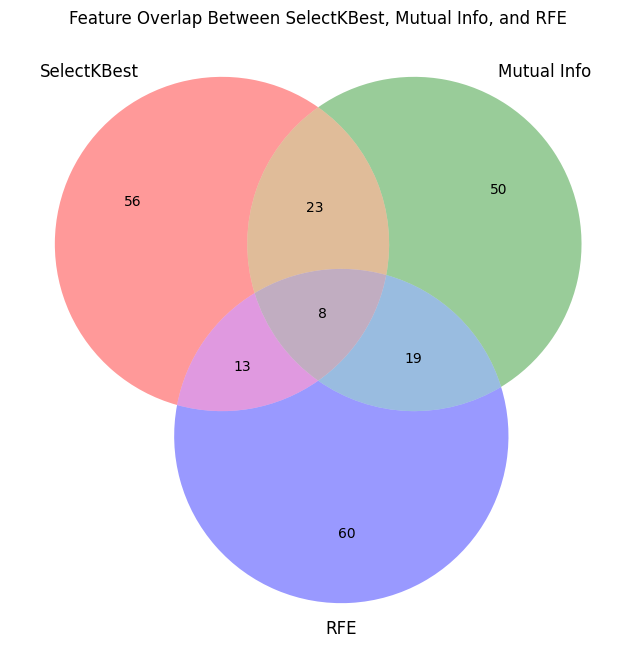


Cross-Validated F1-Scores for Each Method:
                   F1-Score
SelectKBest        0.089737
Mutual Info        0.059210
RFE                0.102629
Random Forest      0.053054
Lasso              0.081956
Var + SelectKBest  0.086868


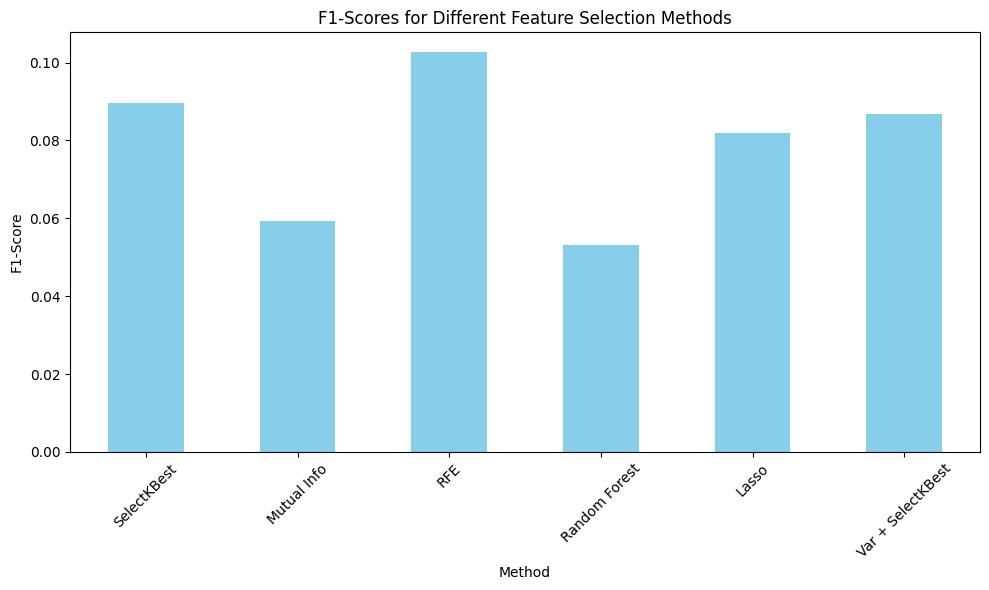

In [54]:
# Convert lists to sets for overlap calculations
methods = {
    'SelectKBest': set(map(str, selected_features_k)),
    'Mutual Info': set(map(str, selected_features_mi)),
    'RFE': set(map(str, selected_features_rfe)),
    'Random Forest': set(top_k_features_rf),
    'Lasso': set(map(str, selected_features_lasso)),
    'Var + SelectKBest': set(map(str, selected_features_kbest_var))
}

# Create a DataFrame to summarize overlaps and key feature retention
summary_data = []
for method1, method2 in combinations(methods.keys(), 2):
    overlap = len(methods[method1] & methods[method2])
    summary_data.append({
        'Method Pair': f"{method1} & {method2}",
        'Overlap': overlap
    })

# Check retention of key features
key_features = ['missing_late_utilization', 'proportion_na_features']
for key_feature in key_features:
    for method, features in methods.items():
        summary_data.append({
            'Method Pair': f"{method} retains {key_feature}",
            'Overlap': int(key_feature in features)
        })

summary_df = pd.DataFrame(summary_data)
print("\nSummary of Overlaps and Key Feature Retention:")
print(summary_df)

# Visualize overlaps (using a Venn diagram for three methods as an example)
plt.figure(figsize=(8, 8))
venn3(
    [methods['SelectKBest'], methods['Mutual Info'], methods['RFE']],
    set_labels=('SelectKBest', 'Mutual Info', 'RFE')
)
plt.title("Feature Overlap Between SelectKBest, Mutual Info, and RFE")
plt.show()

# Evaluate model performance with cross-validated F1-scores
model = LogisticRegression(solver='liblinear', max_iter=1000)
f1_scores = {}

# Prepare datasets for each method
X_selected_df_kbest = X_indicators[selected_features_k]
X_selected_df_mi = X_indicators[[f for f in selected_features_mi if f in X_indicators.columns]]
X_selected_df_rfe = X_indicators[selected_features_rfe]
X_selected_df_rf = X_indicators[[f for f in top_k_features_rf if f in X_indicators.columns]]
X_selected_df_lasso = X_indicators[[f for f in selected_features_lasso if f in X_indicators.columns]]
X_selected_df_var_kbest = X_indicators[selected_features_kbest_var]

# Compute F1-scores
f1_scores['SelectKBest'] = cross_val_score(model, X_selected_df_kbest, Y, cv=5, scoring='f1').mean()
f1_scores['Mutual Info'] = cross_val_score(model, X_selected_df_mi, Y, cv=5, scoring='f1').mean()
f1_scores['RFE'] = cross_val_score(model, X_selected_df_rfe, Y, cv=5, scoring='f1').mean()
f1_scores['Random Forest'] = cross_val_score(model, X_selected_df_rf, Y, cv=5, scoring='f1').mean()
f1_scores['Lasso'] = cross_val_score(model, X_selected_df_lasso, Y, cv=5, scoring='f1').mean()
f1_scores['Var + SelectKBest'] = cross_val_score(model, X_selected_df_var_kbest, Y, cv=5, scoring='f1').mean()

# Display F1-scores
f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score'])
print("\nCross-Validated F1-Scores for Each Method:")
print(f1_df)

# Plot F1-scores
plt.figure(figsize=(10, 6))
f1_df['F1-Score'].plot(kind='bar', color='skyblue')
plt.title('F1-Scores for Different Feature Selection Methods')
plt.ylabel('F1-Score')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

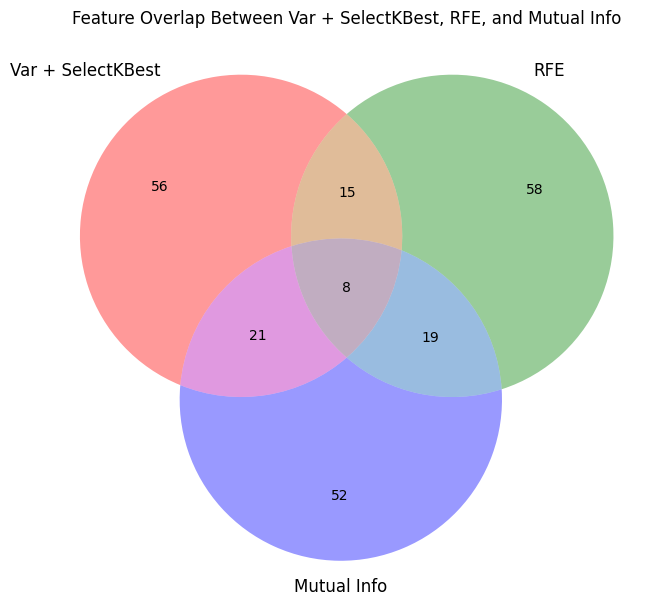

In [55]:
# Convert lists to sets for Venn diagram
set_var_kbest = set(map(str, selected_features_kbest_var))
set_rfe = set(map(str, selected_features_rfe))
set_mi = set(map(str, selected_features_mi))

# Create Venn diagram
plt.figure(figsize=(8, 8))
venn3(
    [set_var_kbest, set_rfe, set_mi],
    set_labels=('Var + SelectKBest', 'RFE', 'Mutual Info')
)
plt.title("Feature Overlap Between Var + SelectKBest, RFE, and Mutual Info")
plt.show()

In [56]:
# Assuming X_indicators and Y are your original data, and selected_features_rfe is the list of 100 features from RFE
X_final = X_indicators[selected_features_rfe]

# Option 1: Use SMOTE (as you did previously)
#smote = SMOTE(random_state=42)
#X_final_sm, Y_sm = smote.fit_resample(X_final, Y)

# Fit logistic regression with sklearn
#model_sm = LogisticRegression(solver='liblinear', max_iter=1000)
#model_sm.fit(X_final_sm, Y_sm)

# Evaluate with cross-validation
#f1_sm = cross_val_score(model_sm, X_final_sm, Y_sm, cv=5, scoring='f1').mean()
#rint(f"F1-score with SMOTE: {f1_sm:.6f}")

# Option 2: Use class weights without SMOTE
model_cw = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model_cw.fit(X_final, Y)

# Evaluate with cross-validation
f1_cw = cross_val_score(model_cw, X_final, Y, cv=5, scoring='f1').mean()
print(f"F1-score with class weights: {f1_cw:.6f}")

# Inspect coefficients (for interpretability, similar to statsmodels summary)
coeffs = pd.DataFrame(model_cw.coef_, columns=X_final.columns)
print("\nLogistic Regression Coefficients (with class weights):")
print(coeffs)

F1-score with class weights: 0.294675

Logistic Regression Coefficients (with class weights):
         15        20       21        27       32        33        35  \
0 -0.254543  0.938769  0.27085 -0.926835 -0.73913  0.301817  1.104904   

         36       37        38        48        59       60        65  \
0 -0.677766  0.63062 -0.053512  1.485018  3.008889  0.13482  0.328346   

         66        76        78        82        84        87        97  \
0 -0.153398  0.947906  1.203165  0.044829  0.103942  0.578413 -0.817839   

         99       100       103       109       112       118       122  \
0 -0.436105  2.387235 -0.798792  0.278691 -0.450977 -0.236416  1.478248   

        125       127       129       130       131       133       141  \
0  0.412778  0.946782 -1.245476  0.516608  0.895354 -0.964758 -0.213122   

        143       146       147       151       157      173       175  \
0 -0.295703 -1.087391 -1.008099  0.242902  0.536326  0.36595  0.368626   

        17

In [57]:
import statsmodels.api as sm

# Select RFE features
X_final = X_indicators[selected_features_rfe]

# Scale the features to prevent numerical instability
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)
X_final_scaled = pd.DataFrame(X_final_scaled, columns=X_final.columns)

# Add intercept for statsmodels
X_final_scaled = sm.add_constant(X_final_scaled)

# Fit logistic regression with statsmodels
logit_model = sm.Logit(Y, X_final_scaled)
result = logit_model.fit(method='lbfgs', maxiter=500)  # Use 'bfgs' optimizer to avoid convergence issues
print(result.summary())

# Extract p-values
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')  # Remove intercept from feature list
print(f"Significant features (p < 0.05): {significant_features}")

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                          100
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.4127
Time:                        16:28:05   Log-Likelihood:                -224.68
converged:                      False   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 3.345e-24
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.6590      4.087     -1.629      0.103     -14.669       1.351
15             -0.3239      0.189     -1.711      0.087      -0.695       0.047
20              0.1752      0.443      0.396    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [58]:
# Replace with the feature list for the dataset (e.g., RFE's 100 features)
X_selected = X_indicators[selected_features_rfe]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Compute VIF to reduce multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns[1:]  # Exclude 'const'
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(1, X_scaled.shape[1])]

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_scaled_reduced = X_scaled.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features due to high VIF: {list(high_vif_features)}")

Removed 42 features due to high VIF: ['35', '37', '38', '66', '118', '143', '151', '173', '175', '176', '178', '203', '205', '212', '214', '218', '269', '278', '286', '311', '313', '319', '322', '334', '337', '339', '341', '350', '352', '356', '391', '407', '444', '446', '447', '449', '455', '458', '476', '525', '565', '567']


In [59]:
# Iterative feature elimination
X_current = X_scaled_reduced.copy()
features_to_keep = list(X_scaled_reduced.columns)
features_to_keep.remove('const')

while True:
    logit_model = sm.Logit(Y, X_current)
    result = logit_model.fit(method='newton', maxiter=1000)
    print(result.summary())

    p_values = result.pvalues
    p_values = p_values.drop('const')

    if (p_values >= 0.05).sum() == 0:
        print("All remaining features are significant (p < 0.05). Stopping.")
        break

    max_p_feature = p_values.idxmax()
    max_p_value = p_values[max_p_feature]
    print(f"Removing feature {max_p_feature} with p-value {max_p_value:.6f}")

    X_current = X_current.drop(columns=max_p_feature)
    features_to_keep.remove(max_p_feature)

print(f"Final significant features: {features_to_keep}")

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177538
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1508
Method:                           MLE   Df Model:                           58
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2728
Time:                        16:28:42   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 6.953e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.3285     13.845     -0.890      0.373     -39.464      14.807
15             -0.3137   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177538
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1510
Method:                           MLE   Df Model:                           56
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2728
Time:                        16:28:43   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.842e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.3093     13.762     -0.894      0.371     -39.282      14.663
15             -0.3136   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1511
Method:                           MLE   Df Model:                           55
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2728
Time:                        16:28:43   Log-Likelihood:                -278.21
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 9.378e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.2920     13.752     -0.894      0.371     -39.245      14.661
15             -0.3137      0.129     -2.427      0.015      -0.567      -0.060
20              0.2729      0.401      0.681    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177554
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1513
Method:                           MLE   Df Model:                           53
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2727
Time:                        16:28:43   Log-Likelihood:                -278.23
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.391e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.0259     13.505     -0.890      0.373     -38.495      14.443
15             -0.3148   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177566
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1514
Method:                           MLE   Df Model:                           52
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2727
Time:                        16:28:44   Log-Likelihood:                -278.25
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.197e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.9347     13.461     -0.887      0.375     -38.318      14.449
15             -0.3154   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177678
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1516
Method:                           MLE   Df Model:                           50
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2722
Time:                        16:28:44   Log-Likelihood:                -278.42
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 3.246e-21
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.9135     13.475     -0.884      0.377     -38.324      14.497
15             -0.3182   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177851
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1518
Method:                           MLE   Df Model:                           48
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2715
Time:                        16:28:44   Log-Likelihood:                -278.69
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 9.127e-22
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.2644     13.952     -0.879      0.379     -39.609      15.080
15             -0.3210   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177918
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1519
Method:                           MLE   Df Model:                           47
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2713
Time:                        16:28:45   Log-Likelihood:                -278.80
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.660e-22
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.2336     13.919     -0.879      0.379     -39.515      15.048
15             -0.3240   

In [60]:
# Retrain with sklearn
X_final_significant = X_indicators[features_to_keep]
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_final_significant, Y)
f1_score = cross_val_score(model, X_final_significant, Y, cv=5, scoring='f1').mean()
print(f"F1-score with significant features: {f1_score:.6f}")

# Inspect coefficients
coeffs = pd.DataFrame(model.coef_, columns=X_final_significant.columns)
print("\nLogistic Regression Coefficients (significant features):")
print(coeffs)

F1-score with significant features: 0.257559

Logistic Regression Coefficients (significant features):
         15        27        32        33        36        59        60  \
0 -0.105257 -0.595941 -0.937633  0.270992 -0.382298  2.420023  0.082267   

         65       76       100       112       122       130       147  \
0  0.088694  1.99683  2.092653 -0.303744  4.018624  0.469543 -1.454052   

        412       417       438       558  
0  0.419557 -0.383347  0.100608  0.054739  


In [61]:
# Assuming X_indicators and Y are your original data, and selected_features_xgbrfe is the list of 100 features from RFE
X_final = X_indicators[selected_features_xgbrfe]

# Option 1: Use SMOTE (as you did previously)
#smote = SMOTE(random_state=42)
#X_final_sm, Y_sm = smote.fit_resample(X_final, Y)

# Fit logistic regression with sklearn
#model_sm = LogisticRegression(solver='liblinear', max_iter=1000)
#model_sm.fit(X_final_sm, Y_sm)

# Evaluate with cross-validation
#f1_sm = cross_val_score(model_sm, X_final_sm, Y_sm, cv=5, scoring='f1').mean()
#rint(f"F1-score with SMOTE: {f1_sm:.6f}")

# Option 2: Use class weights without SMOTE
model_cw = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model_cw.fit(X_final, Y)

# Evaluate with cross-validation
f1_cw = cross_val_score(model_cw, X_final, Y, cv=5, scoring='f1').mean()
print(f"F1-score with class weights: {f1_cw:.6f}")

# Inspect coefficients (for interpretability, similar to statsmodels summary)
coeffs = pd.DataFrame(model_cw.coef_, columns=X_final.columns)
print("\nLogistic Regression Coefficients (with class weights):")
print(coeffs)

F1-score with class weights: 0.174619

Logistic Regression Coefficients (with class weights):
          1       11        17        22        30        34        49  \
0  0.000146 -0.14625  0.443306  0.001217 -0.160278  0.039618 -0.019802   

        60        65        68        73        74        79        80  \
0  0.11072  0.101421 -0.002515  0.011752 -0.150622  0.936032 -0.614199   

         82       85        89        92        93        96        97  \
0  0.643028 -0.13619 -0.000808  0.402056 -0.037702 -0.000359 -0.540426   

        103       104       113       116       118       119       121  \
0 -1.188117  0.111523  0.377675 -0.003361 -0.292262 -0.004247  0.275743   

        125       126       128       130       134      139       141  \
0  1.653249  0.019194 -0.433404  0.441215  0.045672  0.02144 -0.156948   

        147       151      156       164       173       185       189  \
0 -1.427343 -0.071913  0.10025 -0.452712  2.401013 -0.146503  0.018227   

        19

In [62]:
# Select RFE features
X_final = X_indicators[selected_features_xgbrfe]

# Scale the features to prevent numerical instability
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)
X_final_scaled = pd.DataFrame(X_final_scaled, columns=X_final.columns)

# Add intercept for statsmodels
X_final_scaled = sm.add_constant(X_final_scaled)

# Fit logistic regression with statsmodels
logit_model = sm.Logit(Y, X_final_scaled)
result = logit_model.fit(method='lbfgs', maxiter=500)  # Use 'bfgs' optimizer to avoid convergence issues
print(result.summary())

# Extract p-values
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')  # Remove intercept from feature list
print(f"Significant features (p < 0.05): {significant_features}")

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                          100
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.3287
Time:                        16:30:00   Log-Likelihood:                -256.83
converged:                      False   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.920e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.2095      2.934     -1.776      0.076     -10.960       0.541
1              -0.0056      0.136     -0.042      0.967      -0.271       0.260
11              0.0588      0.136      0.431    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
# Replace with the feature list for the dataset (e.g., RFE's 100 features)
X_selected = X_indicators[selected_features_xgbrfe]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Compute VIF to reduce multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns[1:]  # Exclude 'const'
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(1, X_scaled.shape[1])]

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_scaled_reduced = X_scaled.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features due to high VIF: {list(high_vif_features)}")

Removed 27 features due to high VIF: ['17', '118', '156', '164', '185', '248', '253', '284', '299', '321', '346', '347', '386', '429', '478', '520', '550', '552', '555', '558', '565', '567', '568', '569', '570', '580', '581']


In [66]:
# Iterative feature elimination
X_current = X_scaled_reduced.copy()
features_to_keep = list(X_scaled_reduced.columns)
features_to_keep.remove('const')

while True:
    logit_model = sm.Logit(Y, X_current)
    result = logit_model.fit(method='newton', maxiter=1000)
    print(result.summary())

    p_values = result.pvalues
    p_values = p_values.drop('const')

    if (p_values >= 0.05).sum() == 0:
        print("All remaining features are significant (p < 0.05). Stopping.")
        break

    max_p_feature = p_values.idxmax()
    max_p_value = p_values[max_p_feature]
    print(f"Removing feature {max_p_feature} with p-value {max_p_value:.6f}")

    X_current = X_current.drop(columns=max_p_feature)
    features_to_keep.remove(max_p_feature)

print(f"Final significant features: {features_to_keep}")

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179038
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                           73
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:32   Log-Likelihood:                -280.55
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.471e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7502     13.811     -1.068      0.286     -41.818      12.318
1              -0.0052   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179038
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                           72
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:32   Log-Likelihood:                -280.55
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.453e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7489     13.806     -1.068      0.285     -41.809      12.311
1              -0.0053   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179038
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                           71
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:32   Log-Likelihood:                -280.55
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 8.480e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7439     13.806     -1.068      0.286     -41.803      12.315
1              -0.0053   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179038
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           70
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:33   Log-Likelihood:                -280.55
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.916e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7392     13.805     -1.068      0.286     -41.796      12.317
1              -0.0054   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179039
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1497
Method:                           MLE   Df Model:                           69
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:33   Log-Likelihood:                -280.55
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.830e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7535     13.800     -1.069      0.285     -41.801      12.294
11              0.0568   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179040
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                           68
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:33   Log-Likelihood:                -280.56
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.617e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7152     13.776     -1.068      0.285     -41.716      12.286
11              0.0570   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179042
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1499
Method:                           MLE   Df Model:                           67
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2667
Time:                        16:31:33   Log-Likelihood:                -280.56
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 9.187e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7772     13.757     -1.074      0.283     -41.740      12.185
11              0.0572   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179044
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1500
Method:                           MLE   Df Model:                           66
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2666
Time:                        16:31:34   Log-Likelihood:                -280.56
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 5.182e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.8615     13.729     -1.082      0.279     -41.770      12.047
11              0.0570   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179046
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1501
Method:                           MLE   Df Model:                           65
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2666
Time:                        16:31:34   Log-Likelihood:                -280.57
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.901e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7763     13.687     -1.080      0.280     -41.602      12.049
11              0.0570   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179054
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1502
Method:                           MLE   Df Model:                           64
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2666
Time:                        16:31:34   Log-Likelihood:                -280.58
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.620e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7021     13.672     -1.075      0.282     -41.498      12.094
11              0.0582   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179062
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1503
Method:                           MLE   Df Model:                           63
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2666
Time:                        16:31:35   Log-Likelihood:                -280.59
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 8.991e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.5779     13.637     -1.069      0.285     -41.306      12.151
11              0.0577   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179071
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1504
Method:                           MLE   Df Model:                           62
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2665
Time:                        16:31:35   Log-Likelihood:                -280.60
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.956e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.6496     13.631     -1.075      0.282     -41.366      12.067
11              0.0568   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179083
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1505
Method:                           MLE   Df Model:                           61
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2665
Time:                        16:31:35   Log-Likelihood:                -280.62
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.716e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.7291     13.618     -1.082      0.279     -41.420      11.962
11              0.0583   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179099
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1506
Method:                           MLE   Df Model:                           60
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2664
Time:                        16:31:35   Log-Likelihood:                -280.65
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.485e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.4802     13.533     -1.070      0.285     -41.004      12.044
11              0.0590   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179123
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1507
Method:                           MLE   Df Model:                           59
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2663
Time:                        16:31:36   Log-Likelihood:                -280.69
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 8.116e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.6920     13.543     -1.085      0.278     -41.235      11.851
11              0.0615   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179155
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1508
Method:                           MLE   Df Model:                           58
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2662
Time:                        16:31:36   Log-Likelihood:                -280.74
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.439e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.3768     13.481     -1.066      0.286     -40.800      12.046
11              0.0594   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179209
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1510
Method:                           MLE   Df Model:                           56
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2660
Time:                        16:31:37   Log-Likelihood:                -280.82
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.283e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.3740     13.493     -1.065      0.287     -40.820      12.072
11              0.0570   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1511
Method:                           MLE   Df Model:                           55
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2658
Time:                        16:31:37   Log-Likelihood:                -280.88
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 6.907e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.0430     13.461     -1.043      0.297     -40.427      12.341
11              0.0552      0.126      0.439      0.661      -0.191       0.302
22              0.6678      0.191      3.488    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179294
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1512
Method:                           MLE   Df Model:                           54
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2656
Time:                        16:31:37   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 3.711e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.9889     13.480     -1.038      0.299     -40.409      12.431
11              0.0534   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179343
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1513
Method:                           MLE   Df Model:                           53
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2654
Time:                        16:31:37   Log-Likelihood:                -281.03
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.986e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -14.0151     13.510     -1.037      0.300     -40.494      12.464
11              0.0482   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1515
Method:                           MLE   Df Model:                           51
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2650
Time:                        16:31:38   Log-Likelihood:                -281.19
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 5.542e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.6141     13.433     -1.013      0.311     -39.942      12.714
22              0.6686      0.191      3.504      0.000       0.295       1.043
30             -0.0663      0.130     -0.510    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1516
Method:                           MLE   Df Model:                           50
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2648
Time:                        16:31:38   Log-Likelihood:                -281.27
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.898e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.5674     13.400     -1.012      0.311     -39.832      12.697
22              0.6692      0.191      3.509      0.000       0.295       1.043
30             -0.0648      0.130     -0.499    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179626
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1518
Method:                           MLE   Df Model:                           48
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2643
Time:                        16:31:38   Log-Likelihood:                -281.47
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 7.949e-21
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.0502     13.343     -0.978      0.328     -39.201      13.101
22              0.6649   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179701
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1519
Method:                           MLE   Df Model:                           47
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2640
Time:                        16:31:39   Log-Likelihood:                -281.59
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 4.156e-21
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.4925     13.277     -1.016      0.310     -39.515      12.530
22              0.6715   

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.179815
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1520
Method:                           MLE   Df Model:                           46
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2635
Time:                        16:31:39   Log-Likelihood:                -281.77
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 2.256e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9388     13.211     -0.979      0.327     -38.832      12.954
22             0.6698      0

In [65]:
# Retrain with sklearn
X_final_significant = X_indicators[features_to_keep]
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_final_significant, Y)
f1_score = cross_val_score(model, X_final_significant, Y, cv=5, scoring='f1').mean()
print(f"F1-score with significant features: {f1_score:.6f}")

# Inspect coefficients
coeffs = pd.DataFrame(model.coef_, columns=X_final_significant.columns)
print("\nLogistic Regression Coefficients (significant features):")
print(coeffs)

F1-score with significant features: 0.260411

Logistic Regression Coefficients (significant features):
         22        60        65        74        79       125       130  \
0  0.001013  0.087659  0.088105 -0.065985  2.204859  2.603606  0.380113   

        147       417       431       438       512       563       576  
0 -1.526034 -0.245161 -0.007673  0.111757  0.000521 -0.023783 -3.035525  


In [68]:
# Subset to Lasso features
X_lasso = X_indicators[selected_features_lasso]

# Scale the features
scaler = StandardScaler()
X_lasso_scaled = scaler.fit_transform(X_lasso)
X_lasso_scaled = pd.DataFrame(X_lasso_scaled, columns=X_lasso.columns)

# Add intercept
X_lasso_scaled = sm.add_constant(X_lasso_scaled)

# Fit logistic regression with 'lbfgs'
logit_model = sm.Logit(Y, X_lasso_scaled)
result = logit_model.fit(method='lbfgs', maxiter=500)
print(result.summary())

# Extract significant features
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')
print(f"Significant features (p < 0.05): {significant_features}")

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                          100
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.3064
Time:                        16:33:28   Log-Likelihood:                -265.34
converged:                      False   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 8.243e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4647     10.719     -0.790      0.430     -29.474      12.544
2             -0.1823      0.125     -1.462      0.144      -0.427       0.062
3             -0.1528      0.151     -1.011      0.3

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [69]:
X_lasso = X_indicators[selected_features_lasso]

# Scale the features
scaler = StandardScaler()
X_lasso_scaled = scaler.fit_transform(X_lasso)
X_lasso_scaled = pd.DataFrame(X_lasso_scaled, columns=X_lasso.columns)

# Check for extreme values or infinities
print("Checking for infinite values:")
print(np.isinf(X_lasso_scaled).sum())
print("Checking for extreme values (abs > 10):")
print((X_lasso_scaled.abs() > 10).sum())

# Add intercept
X_lasso_scaled = sm.add_constant(X_lasso_scaled)

# Compute VIF to further reduce multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_lasso_scaled.columns[1:]  # Exclude 'const'
vif_data["VIF"] = [variance_inflation_factor(X_lasso_scaled.values, i) for i in range(1, X_lasso_scaled.shape[1])]

print(vif_data)

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_lasso_scaled_reduced = X_lasso_scaled.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features due to high VIF: {list(high_vif_features)}")

# Retry with 'newton' optimizer
logit_model = sm.Logit(Y, X_lasso_scaled_reduced)
result = logit_model.fit(method='newton', maxiter=1000)
print(result.summary())

# Extract significant features
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')
print(f"Significant features (p < 0.05): {significant_features}")

Checking for infinite values:
2      0
3      0
4      0
15     0
16     0
22     0
23     0
24     0
25     0
41     0
47     0
52     0
56     0
60     0
63     0
65     0
68     0
69     0
71     0
72     0
73     0
74     0
89     0
91     0
116    0
134    0
136    0
137    0
138    0
139    0
141    0
152    0
153    0
160    0
162    0
163    0
184    0
186    0
188    0
189    0
201    0
205    0
209    0
224    0
226    0
251    0
253    0
269    0
275    0
295    0
296    0
297    0
298    0
341    0
364    0
414    0
419    0
420    0
424    0
426    0
429    0
432    0
433    0
434    0
437    0
439    0
440    0
457    0
461    0
468    0
469    0
472    0
473    0
474    0
478    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
495    0
497    0
500    0
501    0
511    0
512    0
520    0
542    0
548    0
556    0
562    0
563    0
570    0
573    0
578    0
582    0
dtype: int64
Checking for extreme values (abs > 10):
2       0
3      

In [70]:
# Use X_lasso_scaled_reduced directly (already scaled, 79 features, with intercept)
X_current = X_lasso_scaled_reduced.copy()
features_to_keep = list(X_lasso_scaled_reduced.columns)
features_to_keep.remove('const')  # Exclude the intercept from the feature list

while True:
    # Fit the model
    logit_model = sm.Logit(Y, X_current)
    result = logit_model.fit(method='newton', maxiter=1000)
    print(result.summary())

    # Get p-values
    p_values = result.pvalues
    p_values = p_values.drop('const')

    # Check if all remaining features are significant (p < 0.05)
    if (p_values >= 0.05).sum() == 0:
        print("All remaining features are significant (p < 0.05). Stopping.")
        break

    # Find feature with highest p-value
    max_p_feature = p_values.idxmax()
    max_p_value = p_values[max_p_feature]
    print(f"Removing feature {max_p_feature} with p-value {max_p_value:.6f}")

    # Remove the feature
    X_current = X_current.drop(columns=max_p_feature)
    features_to_keep.remove(max_p_feature)

print(f"Final significant features (Lasso-based, VIF-filtered, iteratively reduced): {features_to_keep}")

Optimization terminated successfully.
         Current function value: 0.179890
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1487
Method:                           MLE   Df Model:                           79
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2632
Time:                        16:34:55   Log-Likelihood:                -281.89
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.202e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1125      0.316    -13.023      0.000      -4.731      -3.494
2             -0.1453      0

In [72]:
# Final significant features
significant_features = ['15', '22', '60', '65', '74', '134', '434', '512', '542']
X_final_significant = X_indicators[significant_features]

# Fit logistic regression with class weights
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_final_significant, Y)

# Evaluate with cross-validation
f1_score = cross_val_score(model, X_final_significant, Y, cv=5, scoring='f1').mean()
print(f"F1-score with significant features (Lasso-based, VIF-filtered, iteratively reduced): {f1_score:.6f}")

# Inspect coefficients
coeffs = pd.DataFrame(model.coef_, columns=X_final_significant.columns)
print("\nLogistic Regression Coefficients (significant features):")
print(coeffs)

F1-score with significant features (Lasso-based, VIF-filtered, iteratively reduced): 0.223325

Logistic Regression Coefficients (significant features):
         15       22        60        65        74       134       434  \
0 -0.081939  0.00047  0.099661  0.084214 -0.095425  0.044236  0.001296   

       512       542  
0  0.00068  0.068105  


In [73]:
# Subset to Variance + SelectKBest features
X_varkbest = X_indicators[selected_features_kbest_var]

# Scale the features
scaler = StandardScaler()
X_varkbest_scaled = scaler.fit_transform(X_varkbest)
X_varkbest_scaled = pd.DataFrame(X_varkbest_scaled, columns=X_varkbest.columns)

# Add intercept
X_varkbest_scaled = sm.add_constant(X_varkbest_scaled)

# Fit logistic regression with 'lbfgs'
logit_model = sm.Logit(Y, X_varkbest_scaled)
result = logit_model.fit(method='newton', maxiter=500)
print(result.summary())

# Extract significant features
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')
print(f"Significant features (p < 0.05): {significant_features}")

Optimization terminated successfully.
         Current function value: 0.167068
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                           94
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.3157
Time:                        16:36:58   Log-Likelihood:                -261.80
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 6.063e-15
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9176      0.220    -17.769      0.000      -4.350

In [74]:
X_selected = X_indicators[selected_features_kbest_var]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Compute VIF to reduce multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns[1:]  # Exclude 'const'
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(1, X_scaled.shape[1])]

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_scaled_reduced = X_scaled.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features due to high VIF: {list(high_vif_features)}")

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removed 59 features due to high VIF: ['22', '27', '64', '65', '66', '71', '123', '128', '139', '160', '161', '164', '165', '166', '167', '181', '184', '197', '198', '200', '204', '206', '295', '296', '300', '301', '302', '320', '334', '342', '412', '431', '432', '435', '436', '437', '438', '453', '456', '470', '472', '476', '478', '551', '552', '554', '555', '557', '558', '574', '578', 'missing_73', 'missing_74', 'missing_113', 'missing_248', 'missing_346', 'missing_347', 'missing_386', 'missing_520']


In [75]:
# Iterative feature elimination
X_current = X_scaled_reduced.copy()
features_to_keep = list(X_scaled_reduced.columns)
features_to_keep.remove('const')

while True:
    logit_model = sm.Logit(Y, X_current)
    result = logit_model.fit(method='newton', maxiter=1000)
    print(result.summary())

    p_values = result.pvalues
    p_values = p_values.drop('const')

    if (p_values >= 0.05).sum() == 0:
        print("All remaining features are significant (p < 0.05). Stopping.")
        break

    max_p_feature = p_values.idxmax()
    max_p_value = p_values[max_p_feature]
    print(f"Removing feature {max_p_feature} with p-value {max_p_value:.6f}")

    X_current = X_current.drop(columns=max_p_feature)
    features_to_keep.remove(max_p_feature)

print(f"Final significant features (Variance + SelectKBest): {features_to_keep}")

Optimization terminated successfully.
         Current function value: 0.197015
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1525
Method:                           MLE   Df Model:                           41
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.1930
Time:                        16:37:14   Log-Likelihood:                -308.72
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 5.724e-14
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.3565      0.166    -20.241      0.000      -3.681

In [76]:
# Final significant features (hypothesized)
X_final_significant = X_indicators[features_to_keep]

# Fit logistic regression with class weights
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_final_significant, Y)

# Evaluate with cross-validation
f1_score = cross_val_score(model, X_final_significant, Y, cv=5, scoring='f1').mean()
print(f"F1-score with significant features (Variance + SelectKBest): {f1_score:.6f}")

# Inspect coefficients
coeffs = pd.DataFrame(model.coef_, columns=X_final_significant.columns)
print("\nLogistic Regression Coefficients (significant features):")
print(coeffs)

F1-score with significant features (Variance + SelectKBest): 0.272949

Logistic Regression Coefficients (significant features):
         15        23        60       112     125       130       176  \
0 -0.100408 -0.001111  0.046704 -0.173871  2.7757  0.497225  1.647711   

        317       417      461       489       511      512       570  
0 -0.292487 -0.290296  0.01842 -0.000788  0.003863  0.00073  0.026281  


In [77]:
# Subset to SelectKBest features
X_kbest = X_indicators[selected_features_k]

# Scale the features
scaler = StandardScaler()
X_kbest_scaled = scaler.fit_transform(X_kbest)
X_kbest_scaled = pd.DataFrame(X_kbest_scaled, columns=X_kbest.columns)

# Add intercept
X_kbest_scaled = sm.add_constant(X_kbest_scaled)

# Fit logistic regression with 'lbfgs'
logit_model = sm.Logit(Y, X_kbest_scaled)
result = logit_model.fit(method='lbfgs', maxiter=500)
print(result.summary())

# Extract significant features
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features:
    significant_features.remove('const')
print(f"Significant features (p < 0.05): {significant_features}")

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                           94
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.3502
Time:                        16:39:11   Log-Likelihood:                -248.60
converged:                      False   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.258e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2329        nan        nan        nan         nan         nan
15             -0.2527        nan        nan        nan         nan         nan
22              0.4364        nan        nan    

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
X_selected = X_indicators[selected_features_k]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Compute VIF to reduce multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns[1:]  # Exclude 'const'
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(1, X_scaled.shape[1])]

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_scaled_reduced = X_scaled.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features due to high VIF: {list(high_vif_features)}")

c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removed 57 features due to high VIF: ['27', '71', '122', '123', '124', '128', '160', '161', '164', '165', '166', '167', '181', '184', '197', '198', '200', '206', '211', '248', '295', '296', '299', '300', '301', '320', '349', '431', '432', '435', '436', '437', '438', '453', '456', '470', '472', '478', '520', '551', '552', '554', '555', '557', '558', '566', '568', '574', '576', 'missing_73', 'missing_74', 'missing_113', 'missing_248', 'missing_346', 'missing_347', 'missing_386', 'missing_520']


In [79]:
# Iterative feature elimination
X_current = X_scaled_reduced.copy()
features_to_keep = list(X_scaled_reduced.columns)
features_to_keep.remove('const')

while True:
    logit_model = sm.Logit(Y, X_current)
    result = logit_model.fit(method='newton', maxiter=1000)
    print(result.summary())

    p_values = result.pvalues
    p_values = p_values.drop('const')

    if (p_values >= 0.05).sum() == 0:
        print("All remaining features are significant (p < 0.05). Stopping.")
        break

    max_p_feature = p_values.idxmax()
    max_p_value = p_values[max_p_feature]
    print(f"Removing feature {max_p_feature} with p-value {max_p_value:.6f}")

    X_current = X_current.drop(columns=max_p_feature)
    features_to_keep.remove(max_p_feature)

print(f"Final significant features (SelectKBest): {features_to_keep}")

Optimization terminated successfully.
         Current function value: 0.192792
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1523
Method:                           MLE   Df Model:                           43
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2103
Time:                        16:39:29   Log-Likelihood:                -302.10
converged:                       True   LL-Null:                       -382.57
Covariance Type:            nonrobust   LLR p-value:                 1.582e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4332      0.175    -19.602      0.000      -3.777      -3.090
15            -0.2445      0.

In [80]:
# Final significant features (hypothesized)
X_final_significant = X_indicators[features_to_keep]

# Fit logistic regression with class weights
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_final_significant, Y)

# Evaluate with cross-validation
f1_score = cross_val_score(model, X_final_significant, Y, cv=5, scoring='f1').mean()
print(f"F1-score with significant features (SelectKBest): {f1_score:.6f}")

# Inspect coefficients
coeffs = pd.DataFrame(model.coef_, columns=X_final_significant.columns)
print("\nLogistic Regression Coefficients (significant features):")
print(coeffs)

F1-score with significant features (SelectKBest): 0.219725

Logistic Regression Coefficients (significant features):
         15        22        57        60        64       65       101  \
0 -0.093267  0.000605  0.280442  0.073423  0.003692  0.07158  0.009094   

        112       125       130       281       512       570  
0 -0.196298  2.960944  0.438956 -0.124185  0.000552  0.020884  


In [82]:
from sklearn.ensemble import RandomForestClassifier

# Mutual Info features (replace with actual list)
X_mi = X_indicators[selected_features_mi]

# Train Random Forest on Mutual Info features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_mi, Y)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features_mi,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print("Top 20 Most Important Features (Mutual Info with Random Forest):")
print(feature_importance_df.head(20))

# F1-score (already computed)
f1_mi = cross_val_score(rf_model, X_mi, Y, cv=5, scoring='f1').mean()
print(f"F1-score with Random Forest on Mutual Info features: {f1_mi:.6f}")

Top 20 Most Important Features (Mutual Info with Random Forest):
   Feature  Importance
64     520    0.065658
37     248    0.052710
50     386    0.044980
46     346    0.038994
47     347    0.031049
18     113    0.027171
11      73    0.024113
12      74    0.019468
9       66    0.018837
75     555    0.018163
83     566    0.018128
80     563    0.017516
65     540    0.015816
96     580    0.014260
59     478    0.013752
72     552    0.013747
97     581    0.013727
87     570    0.013474
82     565    0.013002
78     558    0.012526
F1-score with Random Forest on Mutual Info features: 0.264571


In [83]:
# Apply Mutual Information to select the top 100 features
mi_selector = SelectKBest(score_func=mutual_info_classif, k=100)
mi_selector.fit(X_indicators, Y)
selected_features_mi = X_indicators.columns[mi_selector.get_support()].tolist()
X_mi = X_indicators[selected_features_mi]

print(f"Number of MI-Selected Features: {len(selected_features_mi)}")
print("MI-Selected Features:", selected_features_mi)

# Train XGBoost on the MI-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_mi = cross_val_predict(xgb_model, X_mi, Y, cv=cv, method='predict_proba')[:, 1]

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, MI Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_mi >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)  # Already using f1_val
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (MI Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of MI-Selected Features: 100
MI-Selected Features: ['7', '20', '26', '34', '36', '38', '41', '42', '57', '66', '71', '73', '74', '111', '112', '113', '122', '125', '127', '128', '129', '131', '132', '133', '134', '135', '138', '139', '140', '143', '154', '173', '246', '247', '248', '270', '274', '275', '276', '278', '289', '306', '310', '311', '332', '346', '347', '383', '385', '386', '406', '407', '408', '412', '414', '417', '429', '444', '478', '511', '518', '519', '520', '541', '542', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '574', '575', '576', '577', '578', '579', '580', '581', '582', '584', '590', 'missing_74']

Threshold Tuning Metrics (XGBoost, MI Features):
Threshold: 0.10, Precision: 0.767677, Recall: 0.730769, F1-Score: 0.748768
Threshold: 0.15, Precision: 0.818182, Recall: 0.692308, F1-Score: 0.750000
Threshold: 0.20, Precision: 0.833333, Recall: 0.

In [84]:
# Use the 100 RFE-selected features (already defined as selected_features_rfe)
X_rfe = X_indicators[selected_features_rfe]
print(f"Number of RFE-Selected Features: {len(selected_features_rfe)}")
print("RFE-Selected Features:", selected_features_rfe)

# Train XGBoost on the RFE-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_rfe = cross_val_predict(xgb_model, X_rfe, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, RFE Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_rfe >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (RFE Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of RFE-Selected Features: 100
RFE-Selected Features: ['15', '20', '21', '27', '32', '33', '35', '36', '37', '38', '48', '59', '60', '65', '66', '76', '78', '82', '84', '87', '97', '99', '100', '103', '109', '112', '118', '122', '125', '127', '129', '130', '131', '133', '141', '143', '146', '147', '151', '157', '173', '175', '176', '178', '185', '196', '203', '205', '212', '214', '215', '217', '218', '219', '248', '269', '270', '278', '286', '291', '306', '311', '313', '317', '319', '322', '334', '337', '339', '341', '349', '350', '352', '356', '391', '407', '412', '417', '425', '438', '444', '446', '447', '449', '455', '456', '458', '476', '517', '525', '546', '547', '553', '557', '558', '564', '565', '567', '572', 'missing_113']

Threshold Tuning Metrics (XGBoost, RFE Features):
Threshold: 0.10, Precision: 0.632653, Recall: 0.596154, F1-Score: 0.613861
Threshold: 0.15, Precision: 0.682927, Recall: 0.538462, F1-Score: 0.602151
Threshold: 0.20, Precision: 0.716216, Recall: 0.5096

In [85]:
# Select the top 100 features using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=100)
selector.fit(X_indicators, Y)
selected_features_fclassif = X_indicators.columns[selector.get_support()].tolist()
print(f"Number of SelectKBest (f_classif)-Selected Features: {len(selected_features_fclassif)}")

# Subset the data to the selected features
X_fclassif = X_indicators[selected_features_fclassif]
print("SelectKBest-Selected Features:", selected_features_fclassif)

# Train XGBoost on the SelectKBest (f_classif)-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_fclassif = cross_val_predict(xgb_model, X_fclassif, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, SelectKBest f_classif Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_fclassif >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (SelectKBest f_classif Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of SelectKBest (f_classif)-Selected Features: 100
SelectKBest-Selected Features: ['15', '22', '23', '27', '29', '33', '34', '39', '41', '57', '59', '60', '64', '65', '66', '69', '71', '77', '80', '91', '96', '101', '104', '112', '113', '122', '123', '124', '125', '126', '127', '128', '130', '131', '134', '160', '161', '164', '165', '166', '167', '181', '184', '197', '198', '200', '201', '206', '211', '248', '281', '295', '296', '299', '300', '301', '317', '320', '338', '349', '366', '431', '432', '435', '436', '437', '438', '453', '456', '461', '469', '470', '472', '478', '511', '512', '520', '543', '544', '548', '551', '552', '554', '555', '557', '558', '563', '566', '568', '570', '574', '576', 'missing_73', 'missing_74', 'missing_113', 'missing_248', 'missing_346', 'missing_347', 'missing_386', 'missing_520']

Threshold Tuning Metrics (XGBoost, SelectKBest f_classif Features):
Threshold: 0.10, Precision: 0.669811, Recall: 0.682692, F1-Score: 0.676190
Threshold: 0.15, Precision

In [86]:
from boruta import BorutaPy

# Define the XGBoost model for Boruta
xgb_boruta = XGBClassifier(random_state=42, eval_metric='logloss')

# Initialize Boruta
boruta_selector = BorutaPy(
    xgb_boruta,
    n_estimators='auto',
    random_state=42,
    max_iter=100,  # Number of iterations
    perc=90  # Percentile threshold for feature acceptance
)

# Fit Boruta
boruta_selector.fit(X_indicators.values, Y.values)

# Get selected features
selected_features_boruta = X_indicators.columns[boruta_selector.support_].tolist()
print(f"Number of Boruta-Selected Features: {len(selected_features_boruta)}")
print("Boruta-Selected Features:", selected_features_boruta)

# Subset the data to the selected features
X_boruta = X_indicators[selected_features_boruta]

# Train XGBoost on the Boruta-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_boruta = cross_val_predict(xgb_model, X_boruta, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, Boruta Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_boruta >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (Boruta Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of Boruta-Selected Features: 28
Boruta-Selected Features: ['17', '22', '34', '60', '65', '68', '74', '96', '113', '125', '141', '151', '240', '248', '284', '346', '347', '424', '427', '524', '555', '563', '565', '569', '570', '581', 'missing_73', 'missing_113']

Threshold Tuning Metrics (XGBoost, Boruta Features):
Threshold: 0.10, Precision: 0.731481, Recall: 0.759615, F1-Score: 0.745283
Threshold: 0.15, Precision: 0.791667, Recall: 0.730769, F1-Score: 0.760000
Threshold: 0.20, Precision: 0.827586, Recall: 0.692308, F1-Score: 0.753927
Threshold: 0.25, Precision: 0.843373, Recall: 0.673077, F1-Score: 0.748663
Threshold: 0.30, Precision: 0.846154, Recall: 0.634615, F1-Score: 0.725275
Threshold: 0.35, Precision: 0.849315, Recall: 0.596154, F1-Score: 0.700565
Threshold: 0.40, Precision: 0.845070, Recall: 0.576923, F1-Score: 0.685714
Threshold: 0.45, Precision: 0.876923, Recall: 0.548077, F1-Score: 0.674556
Threshold: 0.50, Precision: 0.888889, Recall: 0.538462, F1-Score: 0.670659
Th

In [87]:
import shap

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_indicators, Y)

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_indicators)

# Calculate average absolute SHAP values for each feature
shap_importance = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'feature': X_indicators.columns,
    'shap_importance': shap_importance
})
shap_importance_df = shap_importance_df.sort_values(by='shap_importance', ascending=False)

# Select top 100 features
selected_features_shap = shap_importance_df['feature'].head(100).tolist()
print(f"Number of SHAP-Selected Features: {len(selected_features_shap)}")
print("SHAP-Selected Features:", selected_features_shap)

# Subset the data to the selected features
X_shap = X_indicators[selected_features_shap]

# Train XGBoost on the SHAP-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_shap = cross_val_predict(xgb_model, X_shap, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, SHAP Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_shap >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (SHAP Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of SHAP-Selected Features: 100
SHAP-Selected Features: ['113', '346', '248', '60', '74', '73', '581', '569', '563', 'missing_73', '556', '564', '11', '582', '558', '386', '1', '347', '548', '570', '22', 'missing_113', '470', '567', '164', '478', '299', '91', '520', '512', '308', '461', '572', '160', '547', '249', '576', '492', '103', '313', '568', '555', '134', '554', '46', '301', '163', '487', '566', '206', '182', '432', '549', '352', '173', '580', '426', '185', '288', '128', '552', '15', '87', '272', '284', '114', '17', '557', '172', '297', '485', '104', '96', '292', '41', '117', '427', '80', '565', '447', '141', '153', '551', '588', '589', '489', '161', '123', '147', '438', '151', '125', '34', '146', '19', '333', '5', '181', '420', '240']

Threshold Tuning Metrics (XGBoost, SHAP Features):
Threshold: 0.10, Precision: 0.728972, Recall: 0.750000, F1-Score: 0.739336
Threshold: 0.15, Precision: 0.784946, Recall: 0.701923, F1-Score: 0.741117
Threshold: 0.20, Precision: 0.833333, R

In [88]:
# Train XGBoost with L1 regularization
xgb_l1 = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    reg_alpha=1.0  # L1 regularization parameter
)
xgb_l1.fit(X_indicators, Y)

# Get feature importance
feature_importance = xgb_l1.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_indicators.columns,
    'importance': feature_importance
})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Select features with non-zero importance (or top 100 for consistency)
selected_features_l1 = importance_df[importance_df['importance'] > 0]['feature'].head(100).tolist()
print(f"Number of L1-Selected Features: {len(selected_features_l1)}")
print("L1-Selected Features:", selected_features_l1)

# Subset the data to the selected features
X_l1 = X_indicators[selected_features_l1]

# Train XGBoost on the L1-selected features
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_l1 = cross_val_predict(xgb_model, X_l1, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning to maximize F1-score
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, L1 Features):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_l1 >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (L1 Features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Number of L1-Selected Features: 100
L1-Selected Features: ['missing_113', '248', '570', '15', 'missing_73', '34', '347', '154', '563', '60', '377', '300', '284', '569', '21', '391', '91', '188', '565', '73', '337', '74', '213', '113', '291', '346', '92', '68', '24', '552', '90', '125', '525', '524', '548', '131', '547', '556', '89', '490', '349', '130', '116', '65', '103', '341', '368', '121', '118', '575', '105', '469', '22', '581', '424', '564', '491', '582', '30', '474', '3', '189', '148', '299', '319', '486', '17', '339', '555', '566', '576', '476', '160', '63', '96', '317', '572', '278', '93', '23', '80', '206', '432', '567', '147', '59', '477', '431', '20', '85', '114', '38', '41', '332', '11', '478', '308', '151', '172', '511']

Threshold Tuning Metrics (XGBoost, L1 Features):
Threshold: 0.10, Precision: 0.772277, Recall: 0.750000, F1-Score: 0.760976
Threshold: 0.15, Precision: 0.822222, Recall: 0.711538, F1-Score: 0.762887
Threshold: 0.20, Precision: 0.829268, Recall: 0.653846,

In [111]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [250],
    'scale_pos_weight': [14],
    'reg_alpha': [0],
    'reg_lambda': [0],
    'gamma': [0.3],
    'subsample': [1.0]
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_l1, Y)

# Best parameters and score
print("Best Parameters (L1 Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, L1 Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_l1_tuned = cross_val_predict(best_xgb, X_l1, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, L1 Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_l1_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (L1 Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (L1 Features): {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, L1 Features): 0.7894993894993895

Threshold Tuning Metrics (XGBoost, L1 Features, Tuned):
Threshold: 0.10, Precision: 0.590909, Recall: 0.875000, F1-Score: 0.705426
Threshold: 0.15, Precision: 0.623188, Recall: 0.826923, F1-Score: 0.710744
Threshold: 0.20, Precision: 0.698276, Recall: 0.778846, F1-Score: 0.736364
Threshold: 0.25, Precision: 0.750000, Recall: 0.778846, F1-Score: 0.764151
Threshold: 0.30, Precision: 0.752475, Recall: 0.730769, F1-Score: 0.741463
Threshold: 0.35, Precision: 0.789474, Recall: 0.721154, F1-Score: 0.753769
Threshold: 0.40, Precision: 0.840909, Recall: 0.711538, F1-Score: 0.770833
Threshold: 0.45, Precision: 0.891566, Recall: 0.711538, F1-Score: 0.791444
Threshold: 0.50, Precision: 0.902439, Recall: 0.711538, F1-Score: 0.795699
Threshold: 0.55, Precision:

In [90]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [200],
    'scale_pos_weight': [14],
    'reg_alpha': [0],
    'reg_lambda': [0],
    'gamma': [0],
    'subsample': [1.0]
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_boruta, Y)

# Best parameters and score
print("Best Parameters (Boruta Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, Boruta Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_boruta_tuned = cross_val_predict(best_xgb, X_boruta, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, Boruta Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_boruta_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (Boruta Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (Boruta Features): {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, Boruta Features): 0.8039019116418498

Threshold Tuning Metrics (XGBoost, Boruta Features, Tuned):
Threshold: 0.10, Precision: 0.611111, Recall: 0.846154, F1-Score: 0.709677
Threshold: 0.15, Precision: 0.677419, Recall: 0.807692, F1-Score: 0.736842
Threshold: 0.20, Precision: 0.740741, Recall: 0.769231, F1-Score: 0.754717
Threshold: 0.25, Precision: 0.782178, Recall: 0.759615, F1-Score: 0.770732
Threshold: 0.30, Precision: 0.819149, Recall: 0.740385, F1-Score: 0.777778
Threshold: 0.35, Precision: 0.844444, Recall: 0.730769, F1-Score: 0.783505
Threshold: 0.40, Precision: 0.883721, Recall: 0.730769, F1-Score: 0.800000
Threshold: 0.45, Precision: 0.882353, Recall: 0.721154, F1-Score: 0.793651
Threshold: 0.50, Precision: 0.914634, Recall: 0.721154, F1-Score: 0.806452
Threshold: 0.55, 

In [91]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [6],
    'learning_rate': [0.1],
    'n_estimators': [120],
    'scale_pos_weight': [14],
    'reg_alpha': [0],
    'reg_lambda': [0.1],
    'gamma': [0],
    'subsample': [1.0]   
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_mi, Y)

# Best parameters and score
print("Best Parameters (MI Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, MI Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_mi_tuned = cross_val_predict(best_xgb, X_mi, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, MI Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_mi_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (MI Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (MI Features): {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, MI Features): 0.7314159925924631

Threshold Tuning Metrics (XGBoost, MI Features, Tuned):
Threshold: 0.10, Precision: 0.637097, Recall: 0.759615, F1-Score: 0.692982
Threshold: 0.15, Precision: 0.669492, Recall: 0.759615, F1-Score: 0.711712
Threshold: 0.20, Precision: 0.735849, Recall: 0.750000, F1-Score: 0.742857
Threshold: 0.25, Precision: 0.754902, Recall: 0.740385, F1-Score: 0.747573
Threshold: 0.30, Precision: 0.789474, Recall: 0.721154, F1-Score: 0.753769
Threshold: 0.35, Precision: 0.831461, Recall: 0.711538, F1-Score: 0.766839
Threshold: 0.40, Precision: 0.833333, Recall: 0.673077, F1-Score: 0.744681
Threshold: 0.45, Precision: 0.862500, Recall: 0.663462, F1-Score: 0.750000
Threshold: 0.50, Precision: 0.868421, Recall: 0.634615, F1-Score: 0.733333
Threshold: 0.55, Precision:

In [92]:
# Subset data to SelectKBest features
X_selectkbest = X_indicators[selected_features_fclassif]

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.3],
    'n_estimators': [50],
    'scale_pos_weight': [14],
    'reg_alpha': [0],
    'reg_lambda': [0.1],
    'gamma': [0],
    'subsample': [1.0]  
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_selectkbest, Y)

# Best parameters and score
print("Best Parameters (SelectKBest Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, SelectKBest Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_selectkbest_tuned = cross_val_predict(best_xgb, X_selectkbest, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, SelectKBest Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_selectkbest_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (SelectKBest Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (SelectKBest Features): {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, SelectKBest Features): 0.7378947368421054

Threshold Tuning Metrics (XGBoost, SelectKBest Features, Tuned):
Threshold: 0.10, Precision: 0.426316, Recall: 0.778846, F1-Score: 0.551020
Threshold: 0.15, Precision: 0.509677, Recall: 0.759615, F1-Score: 0.610039
Threshold: 0.20, Precision: 0.571429, Recall: 0.730769, F1-Score: 0.641350
Threshold: 0.25, Precision: 0.627119, Recall: 0.711538, F1-Score: 0.666667
Threshold: 0.30, Precision: 0.682243, Recall: 0.701923, F1-Score: 0.691943
Threshold: 0.35, Precision: 0.720000, Recall: 0.692308, F1-Score: 0.705882
Threshold: 0.40, Precision: 0.755319, Recall: 0.682692, F1-Score: 0.717172
Threshold: 0.45, Precision: 0.802326, Recall: 0.663462, F1-Score: 0.726316
Threshold: 0.50, Precision: 0.831325, Recall: 0.663462, F1-Score: 0.737968
T

In [93]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [260],
    'scale_pos_weight': [14],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'gamma': [0],
    'subsample': [1.0]  
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_shap, Y)

# Best parameters and score
print("Best Parameters (SHAP Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, SHAP Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_shap_tuned = cross_val_predict(best_xgb, X_shap, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, SHAP Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_shap_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (SHAP Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (SHAP Features): {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 260, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, SHAP Features): 0.7924609861451967

Threshold Tuning Metrics (XGBoost, SHAP Features, Tuned):
Threshold: 0.10, Precision: 0.684615, Recall: 0.855769, F1-Score: 0.760684
Threshold: 0.15, Precision: 0.714286, Recall: 0.817308, F1-Score: 0.762332
Threshold: 0.20, Precision: 0.747748, Recall: 0.798077, F1-Score: 0.772093
Threshold: 0.25, Precision: 0.774510, Recall: 0.759615, F1-Score: 0.766990
Threshold: 0.30, Precision: 0.804124, Recall: 0.750000, F1-Score: 0.776119
Threshold: 0.35, Precision: 0.819149, Recall: 0.740385, F1-Score: 0.777778
Threshold: 0.40, Precision: 0.855556, Recall: 0.740385, F1-Score: 0.793814
Threshold: 0.45, Precision: 0.863636, Recall: 0.730769, F1-Score: 0.791667
Threshold: 0.50, Precision: 0.873563, Recall: 0.730769, F1-Score: 0.795812
Threshold: 0.55, Pr

In [94]:
# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [120],
    'scale_pos_weight': [14],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'gamma': [0],
    'subsample': [1.0]  
}

# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score, average='binary')

# Perform grid search
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1
)
grid_search.fit(X_rfe, Y)

# Best parameters and score
print("Best Parameters (RFE Features):", grid_search.best_params_)
print("Best F1-Score (Grid Search, RFE Features):", grid_search.best_score_)

# Train XGBoost with best parameters and perform threshold tuning
best_xgb = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_scores_xgb_rfe_tuned = cross_val_predict(best_xgb, X_rfe, Y, cv=cv, method='predict_proba')[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, RFE Features, Tuned):")
for threshold in thresholds:
    y_pred = (y_scores_xgb_rfe_tuned >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (RFE Features, Tuned):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")

Best Parameters (RFE Features): {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'scale_pos_weight': 14, 'subsample': 1.0}
Best F1-Score (Grid Search, RFE Features): 0.6798062015503876

Threshold Tuning Metrics (XGBoost, RFE Features, Tuned):
Threshold: 0.10, Precision: 0.327402, Recall: 0.884615, F1-Score: 0.477922
Threshold: 0.15, Precision: 0.399083, Recall: 0.836538, F1-Score: 0.540373
Threshold: 0.20, Precision: 0.465909, Recall: 0.788462, F1-Score: 0.585714
Threshold: 0.25, Precision: 0.516340, Recall: 0.759615, F1-Score: 0.614786
Threshold: 0.30, Precision: 0.579365, Recall: 0.701923, F1-Score: 0.634783
Threshold: 0.35, Precision: 0.642202, Recall: 0.673077, F1-Score: 0.657277
Threshold: 0.40, Precision: 0.670000, Recall: 0.644231, F1-Score: 0.656863
Threshold: 0.45, Precision: 0.730337, Recall: 0.625000, F1-Score: 0.673575
Threshold: 0.50, Precision: 0.787500, Recall: 0.605769, F1-Score: 0.684783
Threshold: 0.55, Preci

<Figure size 1000x1000 with 0 Axes>

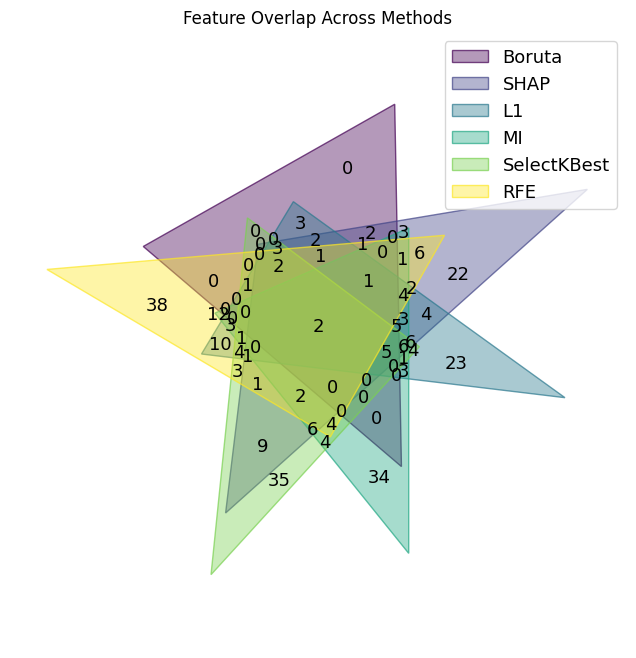

Core Features (selected by all methods): 2 features
{'125', '248'}
Features selected by at least two methods: 131 features
Features unique to Boruta: 0 features
Features unique to SHAP: 22 features
Features unique to L1: 23 features
Features unique to MI: 34 features
Features unique to SelectKBest: 35 features
Features unique to RFE: 38 features
Overlap between Boruta and SHAP: 24 features
Overlap between Boruta and L1: 25 features
Overlap between Boruta and MI: 13 features
Overlap between Boruta and SelectKBest: 13 features
Overlap between Boruta and RFE: 8 features
Overlap between SHAP and SelectKBest: 43 features
Overlap between L1 and SHAP: 47 features
Overlap between L1 and MI: 34 features
Overlap between L1 and SelectKBest: 36 features
Overlap between L1 and RFE: 32 features
Overlap between MI and SHAP: 38 features
Overlap between MI and SelectKBest: 31 features
Overlap between MI and RFE: 30 features
Overlap between RFE and SHAP: 24 features
Overlap between RFE and SelectKBest: 

In [101]:
from venn import venn
from collections import Counter

"""# Replace these with the actual feature lists
selected_features_boruta = X_indicators[selected_features_boruta]    # List of 28 features
selected_features_shap = X_indicators[selected_features_shap]    # List of 100 features
selected_features_l1 = X_indicators[selected_features_l1]    # List of 100 features
selected_features_mi = X_indicators[selected_features_mi]    # List of 100 features
selected_features_selectkbest = X_indicators[selected_features_fclassif]    # List of 100 features
selected_features_rfe = X_indicators[selected_features_rfe]    # List of 100 features"""

# Create a dictionary of feature sets for the Venn diagram
feature_sets = {
    'Boruta': set(selected_features_boruta),
    'SHAP': set(selected_features_shap),
    'L1': set(selected_features_l1),
    'MI': set(selected_features_mi),
    'SelectKBest': set(selected_features_fclassif),
    'RFE': set(selected_features_rfe)
}

# Generate the Venn diagram
plt.figure(figsize=(10, 10))
venn(feature_sets)
plt.title("Feature Overlap Across Methods")
plt.show()

# Analyze overlap numerically
# 1. Features selected by all methods (core features)
core_features = set.intersection(*feature_sets.values())
print(f"Core Features (selected by all methods): {len(core_features)} features")
print(core_features)

# 2. Features selected by at least two methods
all_features = set.union(*feature_sets.values())
features_at_least_two = set()
for feature in all_features:
    count = sum(1 for feature_set in feature_sets.values() if feature in feature_set)
    if count >= 2:
        features_at_least_two.add(feature)
print(f"Features selected by at least two methods: {len(features_at_least_two)} features")

# 3. Features unique to each method
for method, features in feature_sets.items():
    unique_features = features - set.union(*(other_features for other_method, other_features in feature_sets.items() if other_method != method))
    print(f"Features unique to {method}: {len(unique_features)} features")

# 4. Pairwise overlap (optional, for deeper analysis)
for method1, features1 in feature_sets.items():
    for method2, features2 in feature_sets.items():
        if method1 < method2:  # Avoid duplicate pairs
            overlap = len(features1.intersection(features2))
            print(f"Overlap between {method1} and {method2}: {overlap} features")

In [102]:
# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Subset data to the 131 features selected by at least two methods
# (Replace 'features_at_least_two' with the actual list of 131 features from your analysis)
features_at_least_two = list(features_at_least_two)
X_at_least_two = X_indicators[features_at_least_two]

# Perform cross-validation and threshold tuning
y_scores = cross_val_predict(best_xgb, X_at_least_two, Y, cv=cv, method='predict_proba')[:, 1]

thresholds = np.arange(0.1, 0.95, 0.05)
best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0.5

print("\nThreshold Tuning Metrics (XGBoost, Features Selected by At Least Two Methods, 131 features):")
for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    recall = recall_score(Y, y_pred, zero_division=0)
    precision = precision_score(Y, y_pred, zero_division=0)
    f1_val = f1_score(Y, y_pred, zero_division=0)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
    if f1_val > best_f1:
        best_f1 = f1_val
        best_recall = recall
        best_precision = precision
        best_threshold = threshold

print(f"\nXGBoost (Features Selected by At Least Two Methods, 131 features):")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {best_precision:.6f}")
print(f"Recall: {best_recall:.6f}")
print(f"F1-Score: {best_f1:.6f}")


Threshold Tuning Metrics (XGBoost, Features Selected by At Least Two Methods, 131 features):
Threshold: 0.10, Precision: 0.695312, Recall: 0.855769, F1-Score: 0.767241
Threshold: 0.15, Precision: 0.735043, Recall: 0.826923, F1-Score: 0.778281
Threshold: 0.20, Precision: 0.775701, Recall: 0.798077, F1-Score: 0.786730
Threshold: 0.25, Precision: 0.805825, Recall: 0.798077, F1-Score: 0.801932
Threshold: 0.30, Precision: 0.816327, Recall: 0.769231, F1-Score: 0.792079
Threshold: 0.35, Precision: 0.821053, Recall: 0.750000, F1-Score: 0.783920
Threshold: 0.40, Precision: 0.824176, Recall: 0.721154, F1-Score: 0.769231
Threshold: 0.45, Precision: 0.825581, Recall: 0.682692, F1-Score: 0.747368
Threshold: 0.50, Precision: 0.855422, Recall: 0.682692, F1-Score: 0.759358
Threshold: 0.55, Precision: 0.864198, Recall: 0.673077, F1-Score: 0.756757
Threshold: 0.60, Precision: 0.894737, Recall: 0.653846, F1-Score: 0.755556
Threshold: 0.65, Precision: 0.927536, Recall: 0.615385, F1-Score: 0.739884
Thresh

In [103]:
# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform threshold tuning
def threshold_tuning(X, Y, model, cv, thresholds=np.arange(0.1, 0.95, 0.05)):
    y_scores = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:, 1]
    best_f1 = 0
    best_recall = 0
    best_precision = 0
    best_threshold = 0.5

    print(f"\nThreshold Tuning Metrics:")
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(Y, y_pred, zero_division=0)
        precision = precision_score(Y, y_pred, zero_division=0)
        f1_val = f1_score(Y, y_pred, zero_division=0)
        print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
        if f1_val > best_f1:
            best_f1 = f1_val
            best_recall = recall
            best_precision = precision
            best_threshold = threshold

    print(f"\nBest Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_precision:.6f}")
    print(f"Recall: {best_recall:.6f}")
    print(f"F1-Score: {best_f1:.6f}")
    return best_f1

# 1. Boruta + SHAP + L1 (153 features)
print("\nTesting Boruta + SHAP + L1 (Union, 153 features)")
combined_features_boruta_shap_l1 = list(set(selected_features_boruta).union(selected_features_shap, selected_features_l1))
X_combined_boruta_shap_l1 = X_indicators[combined_features_boruta_shap_l1]
f1_boruta_shap_l1 = threshold_tuning(X_combined_boruta_shap_l1, Y, best_xgb, cv)

# 2. Boruta + Unique SHAP + Unique L1 (127 features)
print("\nTesting Boruta + Unique SHAP + Unique L1 (127 features)")
unique_shap = list(set(selected_features_shap) - set(selected_features_boruta).union(selected_features_l1, selected_features_mi, selected_features_k, selected_features_rfe))
unique_l1 = list(set(selected_features_l1) - set(selected_features_boruta).union(selected_features_shap, selected_features_mi, selected_features_k, selected_features_rfe))
combined_features_boruta_shap_l1_unique = list(set(selected_features_boruta).union(unique_shap, unique_l1))
X_boruta_shap_l1_unique = X_indicators[combined_features_boruta_shap_l1_unique]
f1_boruta_shap_l1_unique = threshold_tuning(X_boruta_shap_l1_unique, Y, best_xgb, cv)

# Summary
print("\nSummary of F1-Scores:")
print(f"Features Selected by At Least Two Methods (131 features): 0.801932")
print(f"Boruta + SHAP + L1 (153 features): {f1_boruta_shap_l1:.6f}")
print(f"Boruta + Unique SHAP + Unique L1 (127 features): {f1_boruta_shap_l1_unique:.6f}")


Testing Boruta + SHAP + L1 (Union, 153 features)

Threshold Tuning Metrics:
Threshold: 0.10, Precision: 0.651163, Recall: 0.807692, F1-Score: 0.721030
Threshold: 0.15, Precision: 0.704348, Recall: 0.778846, F1-Score: 0.739726
Threshold: 0.20, Precision: 0.733333, Recall: 0.740385, F1-Score: 0.736842
Threshold: 0.25, Precision: 0.733333, Recall: 0.740385, F1-Score: 0.736842
Threshold: 0.30, Precision: 0.770000, Recall: 0.740385, F1-Score: 0.754902
Threshold: 0.35, Precision: 0.846154, Recall: 0.740385, F1-Score: 0.789744
Threshold: 0.40, Precision: 0.857143, Recall: 0.692308, F1-Score: 0.765957
Threshold: 0.45, Precision: 0.875000, Recall: 0.673077, F1-Score: 0.760870
Threshold: 0.50, Precision: 0.905405, Recall: 0.644231, F1-Score: 0.752809
Threshold: 0.55, Precision: 0.929577, Recall: 0.634615, F1-Score: 0.754286
Threshold: 0.60, Precision: 0.942029, Recall: 0.625000, F1-Score: 0.751445
Threshold: 0.65, Precision: 0.940299, Recall: 0.605769, F1-Score: 0.736842
Threshold: 0.70, Precis

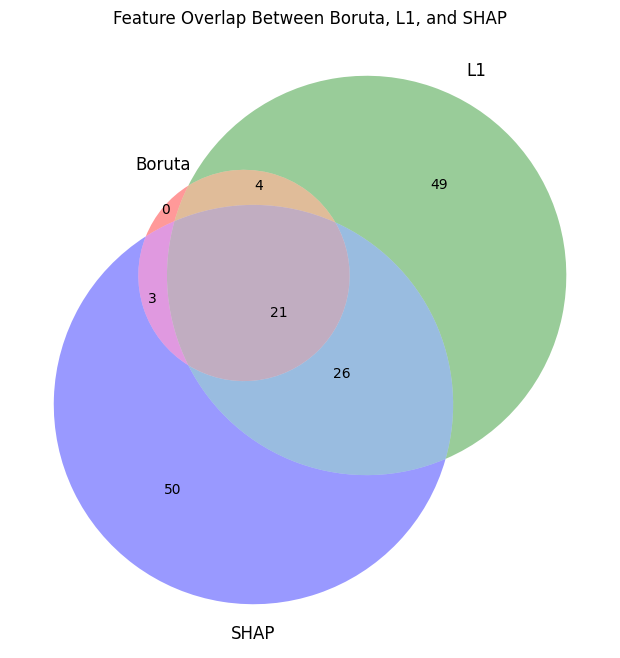

In [104]:
# Convert lists to sets for Venn diagram
set_boruta = set(map(str, selected_features_boruta))
set_l1 = set(map(str, selected_features_l1))
set_shap = set(map(str, selected_features_shap))

# Create Venn diagram
plt.figure(figsize=(8, 8))
venn3(
    [set_boruta, set_l1, set_shap],
    set_labels=('Boruta', 'L1', 'SHAP')
)
plt.title("Feature Overlap Between Boruta, L1, and SHAP")
plt.show()

In [105]:
# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform threshold tuning
def threshold_tuning(X, Y, model, cv, thresholds=np.arange(0.1, 0.95, 0.05)):
    y_scores = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:, 1]
    best_f1 = 0
    best_recall = 0
    best_precision = 0
    best_threshold = 0.5

    print(f"\nThreshold Tuning Metrics:")
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(Y, y_pred, zero_division=0)
        precision = precision_score(Y, y_pred, zero_division=0)
        f1_val = f1_score(Y, y_pred, zero_division=0)
        print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
        if f1_val > best_f1:
            best_f1 = f1_val
            best_recall = recall
            best_precision = precision
            best_threshold = threshold

    print(f"\nBest Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_precision:.6f}")
    print(f"Recall: {best_recall:.6f}")
    print(f"F1-Score: {best_f1:.6f}")
    return best_f1

# 1. Boruta + SHAP ∩ L1 (Excluding Unique Features, ~54 features)
print("\nTesting Boruta + SHAP ∩ L1 (Excluding Unique Features, ~54 features)")
shared_shap_l1 = list(set(selected_features_shap).intersection(selected_features_l1))
combined_features_boruta_shap_l1_shared = list(set(selected_features_boruta).union(shared_shap_l1))
X_boruta_shap_l1_shared = X_indicators[combined_features_boruta_shap_l1_shared]
f1_boruta_shap_l1_shared = threshold_tuning(X_boruta_shap_l1_shared, Y, best_xgb, cv)

# Summary
print("\nSummary of F1-Scores:")
print(f"Boruta (28 features): 0.810811")
print(f"Features Selected by At Least Two Methods (131 features): 0.801932")
print(f"Boruta + SHAP + L1 (153 features): 0.789744")
print(f"Boruta + Unique SHAP + Unique L1 (127 features): 0.767677")
print(f"Boruta + SHAP ∩ L1 (~54 features): {f1_boruta_shap_l1_shared:.6f}")



Testing Boruta + SHAP ∩ L1 (Excluding Unique Features, ~54 features)

Threshold Tuning Metrics:
Threshold: 0.10, Precision: 0.644444, Recall: 0.836538, F1-Score: 0.728033
Threshold: 0.15, Precision: 0.726496, Recall: 0.817308, F1-Score: 0.769231
Threshold: 0.20, Precision: 0.773585, Recall: 0.788462, F1-Score: 0.780952
Threshold: 0.25, Precision: 0.797980, Recall: 0.759615, F1-Score: 0.778325
Threshold: 0.30, Precision: 0.812500, Recall: 0.750000, F1-Score: 0.780000
Threshold: 0.35, Precision: 0.855556, Recall: 0.740385, F1-Score: 0.793814
Threshold: 0.40, Precision: 0.875000, Recall: 0.740385, F1-Score: 0.802083
Threshold: 0.45, Precision: 0.891566, Recall: 0.711538, F1-Score: 0.791444
Threshold: 0.50, Precision: 0.891566, Recall: 0.711538, F1-Score: 0.791444
Threshold: 0.55, Precision: 0.912500, Recall: 0.701923, F1-Score: 0.793478
Threshold: 0.60, Precision: 0.923077, Recall: 0.692308, F1-Score: 0.791209
Threshold: 0.65, Precision: 0.946667, Recall: 0.682692, F1-Score: 0.793296
Thr

In [106]:
# Combine all feature sets into a list of sets
feature_sets = {
    'Boruta': set(selected_features_boruta),
    'SHAP': set(selected_features_shap),
    'L1': set(selected_features_l1),
    'MI': set(selected_features_mi),
    'SelectKBest': set(selected_features_k),
    'RFE': set(selected_features_rfe)
}

# Count how many methods each feature appears in
feature_counts = {}
for feature in set.union(*feature_sets.values()):
    count = sum(1 for feature_set in feature_sets.values() if feature in feature_set)
    feature_counts[feature] = count

# Identify features selected by at least 3 methods
features_at_least_three = [feature for feature, count in feature_counts.items() if count >= 3]
print(f"Number of features selected by at least 3 methods: {len(features_at_least_three)}")

# Combine with Boruta's features
combined_features_boruta_at_least_three = list(set(features_at_least_three).union(selected_features_boruta))
print(f"Number of features (Boruta + At Least 3 Methods): {len(combined_features_boruta_at_least_three)}")

# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform threshold tuning
def threshold_tuning(X, Y, model, cv, thresholds=np.arange(0.1, 0.95, 0.05)):
    y_scores = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:, 1]
    best_f1 = 0
    best_recall = 0
    best_precision = 0
    best_threshold = 0.5

    print(f"\nThreshold Tuning Metrics:")
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(Y, y_pred, zero_division=0)
        precision = precision_score(Y, y_pred, zero_division=0)
        f1_val = f1_score(Y, y_pred, zero_division=0)
        print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
        if f1_val > best_f1:
            best_f1 = f1_val
            best_recall = recall
            best_precision = precision
            best_threshold = threshold

    print(f"\nBest Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_precision:.6f}")
    print(f"Recall: {best_recall:.6f}")
    print(f"F1-Score: {best_f1:.6f}")
    return best_f1

# Test Boruta + Features Selected by At Least 3 Methods
print(f"\nTesting Boruta + Features Selected by At Least 3 Methods ({len(combined_features_boruta_at_least_three)} features)")
X_boruta_at_least_three = X_indicators[combined_features_boruta_at_least_three]
f1_boruta_at_least_three = threshold_tuning(X_boruta_at_least_three, Y, best_xgb, cv)

# Summary
print("\nSummary of F1-Scores:")
print(f"Boruta (28 features): 0.810811")
print(f"Features Selected by At Least Two Methods (131 features): 0.801932")
print(f"Boruta + SHAP + L1 (153 features): 0.789744")
print(f"Boruta + Unique SHAP + Unique L1 (127 features): 0.767677")
print(f"Boruta + SHAP ∩ L1 (~54 features): 0.802083")
print(f"Boruta + Features Selected by At Least 3 Methods ({len(combined_features_boruta_at_least_three)} features): {f1_boruta_at_least_three:.6f}")

Number of features selected by at least 3 methods: 68
Number of features (Boruta + At Least 3 Methods): 73

Testing Boruta + Features Selected by At Least 3 Methods (73 features)

Threshold Tuning Metrics:
Threshold: 0.10, Precision: 0.641791, Recall: 0.826923, F1-Score: 0.722689
Threshold: 0.15, Precision: 0.703390, Recall: 0.798077, F1-Score: 0.747748
Threshold: 0.20, Precision: 0.747664, Recall: 0.769231, F1-Score: 0.758294
Threshold: 0.25, Precision: 0.804124, Recall: 0.750000, F1-Score: 0.776119
Threshold: 0.30, Precision: 0.815217, Recall: 0.721154, F1-Score: 0.765306
Threshold: 0.35, Precision: 0.824176, Recall: 0.721154, F1-Score: 0.769231
Threshold: 0.40, Precision: 0.831461, Recall: 0.711538, F1-Score: 0.766839
Threshold: 0.45, Precision: 0.847059, Recall: 0.692308, F1-Score: 0.761905
Threshold: 0.50, Precision: 0.857143, Recall: 0.692308, F1-Score: 0.765957
Threshold: 0.55, Precision: 0.898734, Recall: 0.682692, F1-Score: 0.775956
Threshold: 0.60, Precision: 0.898734, Recall

In [108]:
# Compute Boruta + SHAP ∩ L1 (~54 features)
shared_shap_l1 = list(set(selected_features_shap).intersection(selected_features_l1))
combined_features_boruta_shap_l1 = list(set(selected_features_boruta).union(shared_shap_l1))
print(f"Number of features in Boruta + SHAP ∩ L1: {len(combined_features_boruta_shap_l1)}")

# Combine all feature sets into a list of sets for "At Least 4 Methods"
feature_sets = {
    'Boruta': set(selected_features_boruta),
    'SHAP': set(selected_features_shap),
    'L1': set(selected_features_l1),
    'MI': set(selected_features_mi),
    'SelectKBest': set(selected_features_k),
    'RFE': set(selected_features_rfe)
}

# Count how many methods each feature appears in
feature_counts = {}
for feature in set.union(*feature_sets.values()):
    count = sum(1 for feature_set in feature_sets.values() if feature in feature_set)
    feature_counts[feature] = count

# Identify features selected by at least 4 methods
features_at_least_four = [feature for feature, count in feature_counts.items() if count >= 4]
print(f"Number of features selected by at least 4 methods: {len(features_at_least_four)}")

# Combine Boruta + SHAP ∩ L1 + At Least 4 Methods
combined_features = list(set(combined_features_boruta_shap_l1).union(features_at_least_four))
print(f"Number of features (Boruta + SHAP ∩ L1 + At Least 4 Methods): {len(combined_features)}")

Number of features in Boruta + SHAP ∩ L1: 54
Number of features selected by at least 4 methods: 34
Number of features (Boruta + SHAP ∩ L1 + At Least 4 Methods): 57


In [109]:
# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform threshold tuning
def threshold_tuning(X, Y, model, cv, thresholds=np.arange(0.1, 0.95, 0.05)):
    y_scores = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:, 1]
    best_f1 = 0
    best_recall = 0
    best_precision = 0
    best_threshold = 0.5

    print(f"\nThreshold Tuning Metrics:")
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(Y, y_pred, zero_division=0)
        precision = precision_score(Y, y_pred, zero_division=0)
        f1_val = f1_score(Y, y_pred, zero_division=0)
        print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
        if f1_val > best_f1:
            best_f1 = f1_val
            best_recall = recall
            best_precision = precision
            best_threshold = threshold

    print(f"\nBest Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_precision:.6f}")
    print(f"Recall: {best_recall:.6f}")
    print(f"F1-Score: {best_f1:.6f}")
    return best_f1

# Test Boruta + SHAP ∩ L1 + At Least 4 Methods
print(f"\nTesting Boruta + SHAP ∩ L1 + At Least 4 Methods ({len(combined_features)} features)")
X_combined = X_indicators[combined_features]
f1_combined = threshold_tuning(X_combined, Y, best_xgb, cv)

# Summary
print("\nSummary of F1-Scores:")
print(f"Boruta (28 features): 0.810811")
print(f"Features Selected by At Least Two Methods (131 features): 0.801932")
print(f"Boruta + SHAP + L1 (153 features): 0.789744")
print(f"Boruta + Unique SHAP + Unique L1 (127 features): 0.767677")
print(f"Boruta + SHAP ∩ L1 (~54 features): 0.802083")
print(f"Boruta + Features Selected by At Least 3 Methods (70 features): 0.776119")
print(f"Boruta + SHAP ∩ L1 + At Least 4 Methods ({len(combined_features)} features): {f1_combined:.6f}")


Testing Boruta + SHAP ∩ L1 + At Least 4 Methods (57 features)

Threshold Tuning Metrics:
Threshold: 0.10, Precision: 0.610294, Recall: 0.798077, F1-Score: 0.691667
Threshold: 0.15, Precision: 0.675000, Recall: 0.778846, F1-Score: 0.723214
Threshold: 0.20, Precision: 0.727273, Recall: 0.769231, F1-Score: 0.747664
Threshold: 0.25, Precision: 0.772277, Recall: 0.750000, F1-Score: 0.760976
Threshold: 0.30, Precision: 0.785714, Recall: 0.740385, F1-Score: 0.762376
Threshold: 0.35, Precision: 0.800000, Recall: 0.730769, F1-Score: 0.763819
Threshold: 0.40, Precision: 0.815217, Recall: 0.721154, F1-Score: 0.765306
Threshold: 0.45, Precision: 0.833333, Recall: 0.721154, F1-Score: 0.773196
Threshold: 0.50, Precision: 0.848837, Recall: 0.701923, F1-Score: 0.768421
Threshold: 0.55, Precision: 0.867470, Recall: 0.692308, F1-Score: 0.770053
Threshold: 0.60, Precision: 0.898734, Recall: 0.682692, F1-Score: 0.775956
Threshold: 0.65, Precision: 0.909091, Recall: 0.673077, F1-Score: 0.773481
Threshold:

In [110]:
# Define XGBoost model with Boruta's best hyperparameters
best_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=14,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    eval_metric='logloss'
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform threshold tuning
def threshold_tuning(X, Y, model, cv, thresholds=np.arange(0.1, 0.95, 0.05)):
    y_scores = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:, 1]
    best_f1 = 0
    best_recall = 0
    best_precision = 0
    best_threshold = 0.5

    print(f"\nThreshold Tuning Metrics:")
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(Y, y_pred, zero_division=0)
        precision = precision_score(Y, y_pred, zero_division=0)
        f1_val = f1_score(Y, y_pred, zero_division=0)
        print(f"Threshold: {threshold:.2f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1_val:.6f}")
        if f1_val > best_f1:
            best_f1 = f1_val
            best_recall = recall
            best_precision = precision
            best_threshold = threshold

    print(f"\nBest Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_precision:.6f}")
    print(f"Recall: {best_recall:.6f}")
    print(f"F1-Score: {best_f1:.6f}")
    return best_f1


# Debug: Inspect feature lists
print("selected_features_boruta:", selected_features_boruta)
print("selected_features_shap:", selected_features_shap)
print("selected_features_l1:", selected_features_l1)

# Ensure feature names are strings
selected_features_boruta = [str(feat) for feat in selected_features_boruta]
selected_features_shap = [str(feat) for feat in selected_features_shap]
selected_features_l1 = [str(feat) for feat in selected_features_l1]

# Compute Boruta + SHAP ∩ L1 (~51 features)
shared_shap_l1 = list(set(selected_features_shap).intersection(selected_features_l1))
combined_features_boruta_shap_l1 = list(set(selected_features_boruta).union(shared_shap_l1))
print(f"Number of features in Boruta + SHAP ∩ L1 (before adjustment): {len(combined_features_boruta_shap_l1)}")
print("Features in combined_features_boruta_shap_l1 (before adjustment):", combined_features_boruta_shap_l1)

# Debug: Inspect X_indicators columns
print("Columns in X_indicators:", X_indicators.columns.tolist())
print("Number of columns in X_indicators:", len(X_indicators.columns))

# Ensure X_indicators columns are strings
X_indicators.columns = X_indicators.columns.astype(str)

# Filter features that exist in X_indicators
combined_features_boruta_shap_l1 = [feat for feat in combined_features_boruta_shap_l1 if feat in X_indicators.columns]
print(f"Number of features in Boruta + SHAP ∩ L1 (after adjustment): {len(combined_features_boruta_shap_l1)}")
print("Features in combined_features_boruta_shap_l1 (after adjustment):", combined_features_boruta_shap_l1)

# Check if the list is empty
if not combined_features_boruta_shap_l1:
    raise ValueError("No features remaining after adjustment. Check feature name alignment.")

# Train XGBoost to get feature importances
X_boruta_shap_l1 = X_indicators[combined_features_boruta_shap_l1]
best_xgb.fit(X_boruta_shap_l1, Y)
importances = best_xgb.feature_importances_
feature_importance_dict = dict(zip(combined_features_boruta_shap_l1, importances))

# Identify non-Boruta features in SHAP ∩ L1
boruta_features = set(selected_features_boruta)
non_boruta_features = [feat for feat in shared_shap_l1 if feat not in boruta_features]
non_boruta_importances = {feat: feature_importance_dict[feat] for feat in non_boruta_features}
print(f"Number of non-Boruta features in SHAP ∩ L1: {len(non_boruta_features)}")

# Select top 11 non-Boruta features from SHAP ∩ L1 (to get total ~39 features: 28 Boruta + 11 others)
top_11_non_boruta = sorted(non_boruta_importances, key=non_boruta_importances.get, reverse=True)[:11]
reduced_features = list(set(selected_features_boruta).union(top_11_non_boruta))
print(f"Number of features (Boruta + Top 11 from SHAP ∩ L1): {len(reduced_features)}")

# Test the reduced feature set
print(f"\nTesting Boruta + Top 11 from SHAP ∩ L1 ({len(reduced_features)} features)")
X_reduced = X_indicators[reduced_features]
f1_reduced = threshold_tuning(X_reduced, Y, best_xgb, cv)

# Summary
print("\nSummary of F1-Scores:")
print(f"Boruta (28 features): 0.810811")
print(f"Features Selected by At Least Two Methods (131 features): 0.801932")
print(f"Boruta + SHAP + L1 (153 features): 0.789744")
print(f"Boruta + Unique SHAP + Unique L1 (127 features): 0.767677")
print(f"Boruta + SHAP ∩ L1 (~54 features): 0.802083")
print(f"Boruta + Features Selected by At Least 3 Methods (70 features): 0.776119")
print(f"Boruta + SHAP ∩ L1 + At Least 4 Methods (57 features): 0.775956")
print(f"Boruta + Top 11 from SHAP ∩ L1 ({len(reduced_features)} features): {f1_reduced}")

selected_features_boruta: ['17', '22', '34', '60', '65', '68', '74', '96', '113', '125', '141', '151', '240', '248', '284', '346', '347', '424', '427', '524', '555', '563', '565', '569', '570', '581', 'missing_73', 'missing_113']
selected_features_shap: ['113', '346', '248', '60', '74', '73', '581', '569', '563', 'missing_73', '556', '564', '11', '582', '558', '386', '1', '347', '548', '570', '22', 'missing_113', '470', '567', '164', '478', '299', '91', '520', '512', '308', '461', '572', '160', '547', '249', '576', '492', '103', '313', '568', '555', '134', '554', '46', '301', '163', '487', '566', '206', '182', '432', '549', '352', '173', '580', '426', '185', '288', '128', '552', '15', '87', '272', '284', '114', '17', '557', '172', '297', '485', '104', '96', '292', '41', '117', '427', '80', '565', '447', '141', '153', '551', '588', '589', '489', '161', '123', '147', '438', '151', '125', '34', '146', '19', '333', '5', '181', '420', '240']
selected_features_l1: ['missing_113', '248', '570

In [473]:
non_boruta_importances = {feat: feature_importance_dict[feat] for feat in non_boruta_features}
top_11_non_boruta = sorted(non_boruta_importances, key=non_boruta_importances.get, reverse=True)[:11]

print("Non-Boruta features in SHAP ∩ L1 with importance scores:")
for feat, importance in sorted(non_boruta_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"Feature: {feat}, Importance: {importance:.6f}")

eleventh_feature = top_11_non_boruta[-1]
print(f"11th feature: {eleventh_feature}")

import shap
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_boruta_shap_l1)
feature_idx = combined_features_boruta_shap_l1.index(eleventh_feature)
print(f"SHAP values for {eleventh_feature}:", shap_values[:, feature_idx])

correlation = X_boruta_shap_l1['572'].corr(Y)
print(f"Correlation of feature 572 with target (Y): {correlation:.6f}")

Non-Boruta features in SHAP ∩ L1 with importance scores:
Feature: 564, Importance: 0.048140
Feature: 41, Importance: 0.032679
Feature: 548, Importance: 0.024367
Feature: 547, Importance: 0.017568
Feature: 206, Importance: 0.015771
Feature: 147, Importance: 0.013302
Feature: 556, Importance: 0.012581
Feature: 582, Importance: 0.009973
Feature: 432, Importance: 0.008827
Feature: 299, Importance: 0.008369
Feature: 572, Importance: 0.008363
Feature: 478, Importance: 0.007946
Feature: 552, Importance: 0.007813
Feature: 73, Importance: 0.007668
Feature: 91, Importance: 0.007273
Feature: 308, Importance: 0.006724
Feature: 567, Importance: 0.006480
Feature: 114, Importance: 0.006454
Feature: 11, Importance: 0.006368
Feature: 15, Importance: 0.006199
Feature: 160, Importance: 0.005815
Feature: 566, Importance: 0.005336
Feature: 80, Importance: 0.004970
Feature: 103, Importance: 0.003602
Feature: 576, Importance: 0.003346
Feature: 172, Importance: 0.001432
11th feature: 572
SHAP values for 572: 

In [474]:
# Add feature '572' to Boruta's features
boruta_plus_572 = list(set(selected_features_boruta).union(['572']))
print(f"Number of features (Boruta + 572): {len(boruta_plus_572)}")

# Test the new feature set
print(f"\nTesting Boruta + Feature 572 ({len(boruta_plus_572)} features)")
X_reduced = X_indicators[boruta_plus_572]
f1_reduced = threshold_tuning(X_reduced, Y, best_xgb, cv)

Number of features (Boruta + 572): 29

Testing Boruta + Feature 572 (29 features)

Threshold Tuning Metrics:
Threshold: 0.10, Precision: 0.608108, Recall: 0.865385, F1-Score: 0.714286
Threshold: 0.15, Precision: 0.671875, Recall: 0.826923, F1-Score: 0.741379
Threshold: 0.20, Precision: 0.714286, Recall: 0.769231, F1-Score: 0.740741
Threshold: 0.25, Precision: 0.757282, Recall: 0.750000, F1-Score: 0.753623
Threshold: 0.30, Precision: 0.802083, Recall: 0.740385, F1-Score: 0.770000
Threshold: 0.35, Precision: 0.810526, Recall: 0.740385, F1-Score: 0.773869
Threshold: 0.40, Precision: 0.822222, Recall: 0.711538, F1-Score: 0.762887
Threshold: 0.45, Precision: 0.848837, Recall: 0.701923, F1-Score: 0.768421
Threshold: 0.50, Precision: 0.876543, Recall: 0.682692, F1-Score: 0.767568
Threshold: 0.55, Precision: 0.873418, Recall: 0.663462, F1-Score: 0.754098
Threshold: 0.60, Precision: 0.881579, Recall: 0.644231, F1-Score: 0.744444
Threshold: 0.65, Precision: 0.878378, Recall: 0.625000, F1-Score: 

In [475]:
print("Boruta features:", selected_features_boruta)

Boruta features: ['17', '22', '34', '60', '65', '68', '74', '96', '113', '125', '141', '151', '240', '248', '284', '346', '347', '424', '427', '524', '555', '563', '565', '569', '570', '581', 'missing_73', 'missing_113']


In [ ]:
""" def backward_elimination(X, y, p_threshold=0.05):

    Perform backward elimination to select features with p-values below the threshold.
   
    Parameters:
    - X: pandas DataFrame of features
    - y: pandas Series or numpy array of target variable
    - p_threshold: float, p-value threshold for feature significance (default: 0.05)
   
    Returns:
    - X_selected: pandas DataFrame with selected features
    - selected_features: list of selected feature names
    
    # Ensure X is a DataFrame and y is a Series or array
    X = pd.DataFrame(X)
    y = pd.Series(Y) if isinstance(Y, (pd.Series, np.ndarray)) else pd.Series(Y.values)
   
    # Add a constant term for the intercept in statsmodels
    X_with_const = sm.add_constant(X)
   
    # Initialize selected features
    selected_features = list(X.columns)
   
    while len(selected_features) > 0:
        # Fit logistic regression model using statsmodels
        model = sm.Logit(y, X_with_const).fit(disp=0)  # disp=0 suppresses convergence messages
       
        # Get p-values (excluding the constant term)
        p_values = model.pvalues[1:]  # Skip the 'const' term
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
       
        if max_p_value > p_threshold:
            # Remove the feature with the highest p-value
            selected_features.remove(max_p_feature)
            X_with_const = X_with_const.drop(columns=max_p_feature)
        else:
            break
   
    # Return the selected features and the corresponding DataFrame
    X_selected = X[selected_features]
    return X_selected, selected_features

# Example usage (will be integrated into the pipeline):
# X_selected, selected_features = backward_elimination(X_vif_filtered, Y, p_threshold=0.05) """